<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_scores_csv = 'sat_scores.csv'
rows = []
with open(sat_scores_csv, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
f.close()
print ('file closed')

file closed


In [3]:
data = {item[0]: [value for value in item[1:]] for item in zip(rows[0], *rows[1:])}

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
sat_score_df = pd.DataFrame(data)
sat_score = pd.read_csv(sat_scores_csv)

In [5]:
print (f"Data types from SAT dictionary:\n{sat_score_df.dtypes}")

Data types from SAT dictionary:
State     object
Rate      object
Verbal    object
Math      object
dtype: object


In [6]:
print (f"Data types from read_csv:\n{sat_score.dtypes}")

Data types from read_csv:
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


<h4><i><b>Answer:</b></i></h4>

The columns in the dataframe from the dictionary are of type `object` because the columns contain strings. However, the numeric columns from the read_csv() function are interpreted as `int`.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
sat_score.head(10)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

<h4><i><b>Answer:</b></i></h4>
    
The data shows the Verbal and Math scores for each state in the USA.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

<h4><i><b>Answer:</b></i></h4>

* State (string): The state in USA
* Rate (int): The proportion of students from the state that takes the SAT
* Verbal (int): The median score on the verbal section in the state
* Math (int): The median score on the math section in the state
* 52 rows, 4 columns in the dataset

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

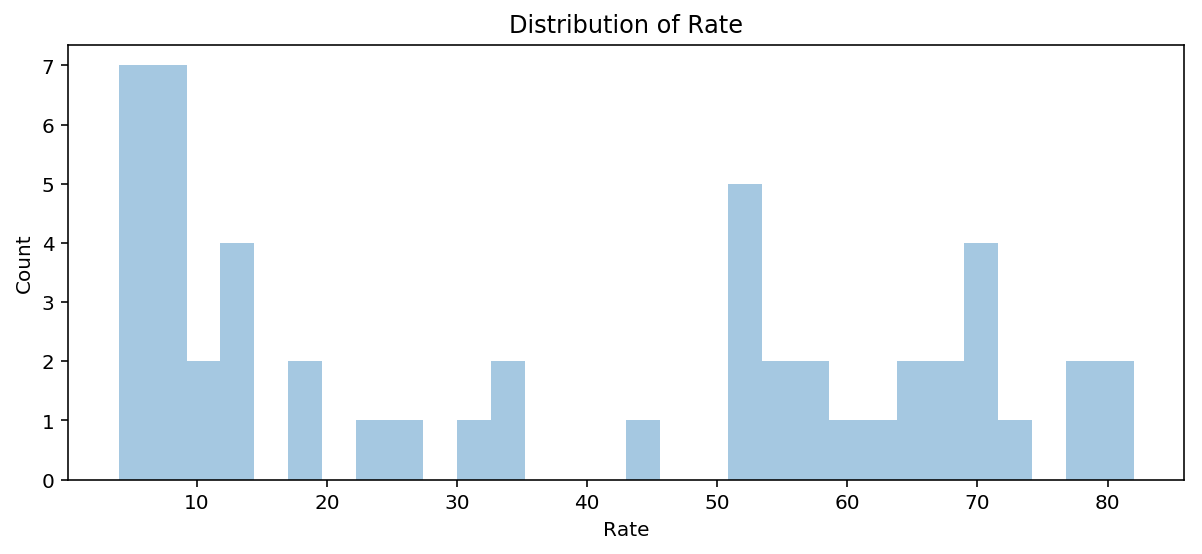

In [8]:
plt.figure(figsize=(10,4))
sns.distplot(sat_score['Rate'], bins=30, kde=False)
plt.title('Distribution of Rate')
plt.ylabel('Count')
plt.show()

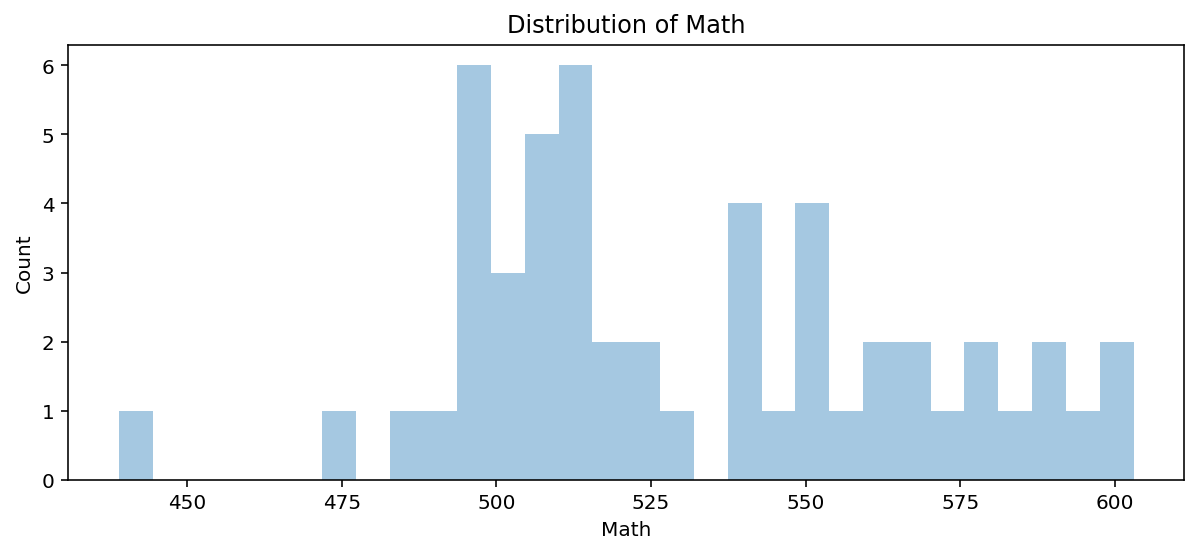

In [9]:
plt.figure(figsize=(10,4))
sns.distplot(sat_score['Math'], bins=30, kde=False)
plt.title('Distribution of Math')
plt.ylabel('Count')
plt.show()

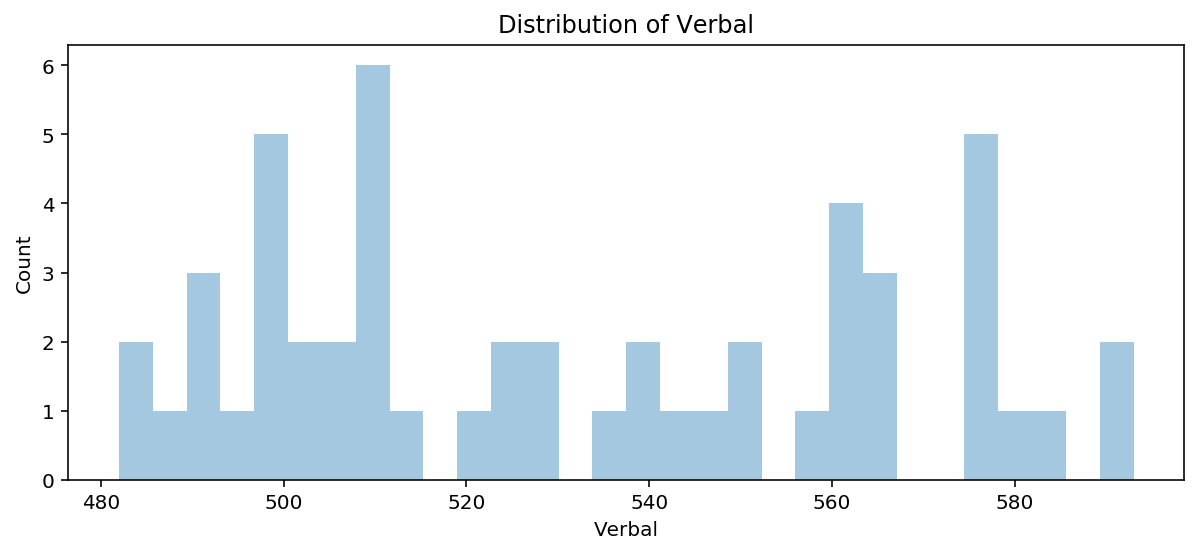

In [10]:
plt.figure(figsize=(10,4))
sns.distplot(sat_score['Verbal'], bins=30, kde=False)
plt.title('Distribution of Verbal')
plt.ylabel('Count')
plt.show()

<h4><i><b>Answer:</b></i></h4>
    
*Observations*

* Most of the `Rate` values are concentrated around 10 and between 50 to 70
* The most frequent `Math` values are between 500 and 525
* There are double peaks in the `Verbal` values near 510 and 580

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

/Users/joshuamei/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


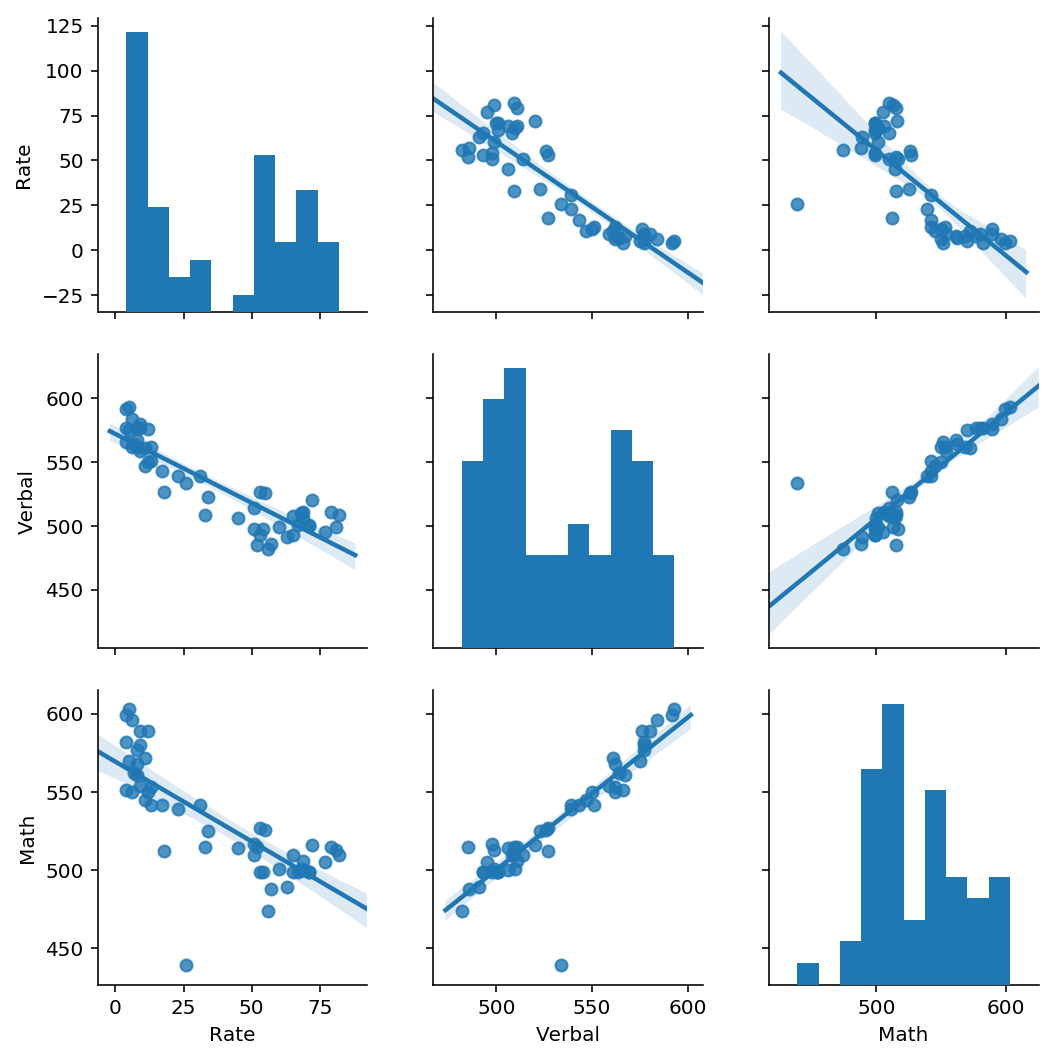

In [11]:
sns.pairplot(sat_score, kind="reg")
plt.show()

<h4><i><b>Answer:</b></i></h4>
    
*Observations*

* There is a strong positive linear correlation between `Verbal` and `Math`
* There seems to be some negative linear correlation between `Rate` and `Verbal` as well as between `Rate` and `Math`

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

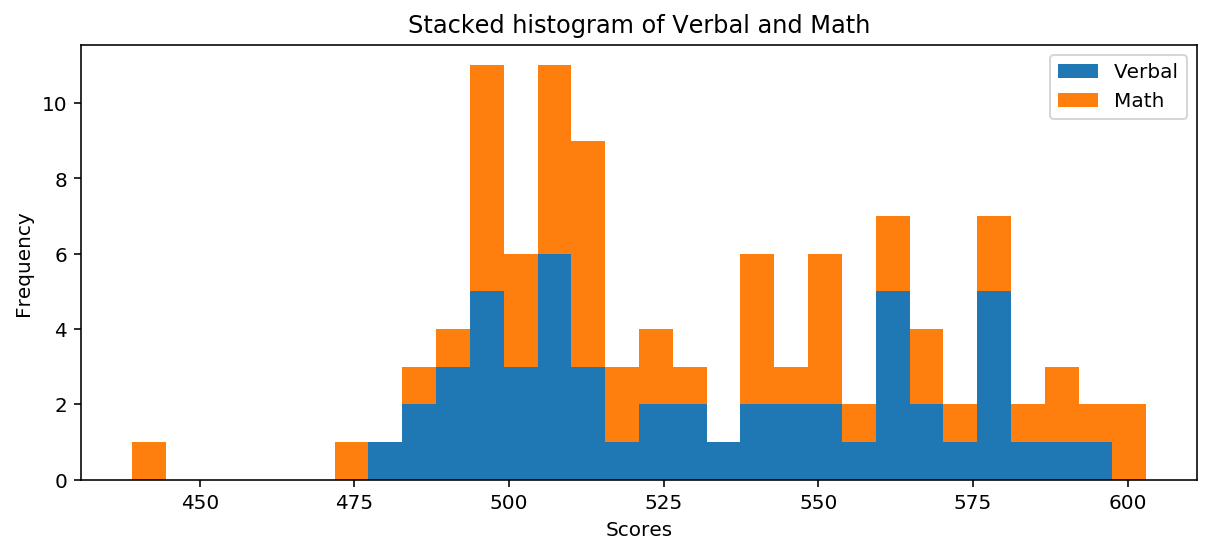

In [12]:
sat_score[['Verbal', 'Math']].plot(kind='hist', stacked=True, bins=30, figsize=(10,4))
plt.title('Stacked histogram of Verbal and Math')
plt.xlabel('Scores')
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

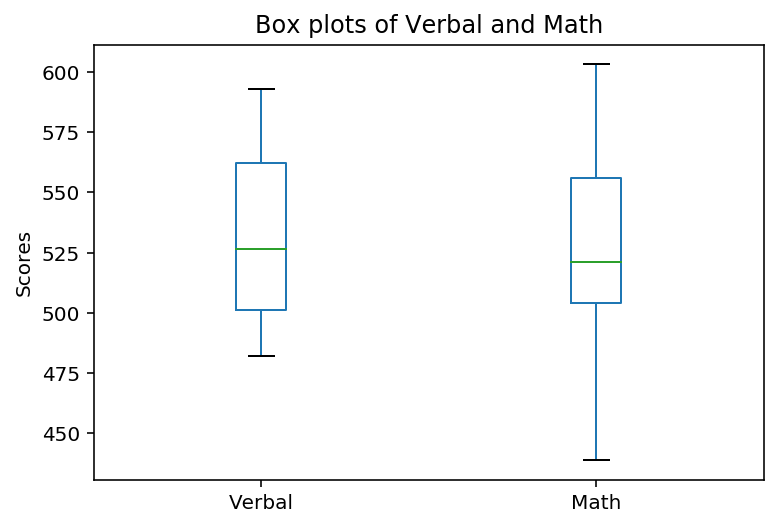

In [13]:
sat_score[['Verbal', 'Math']].plot(kind='box')
plt.title('Box plots of Verbal and Math')
plt.ylabel('Scores')
plt.show()

<h4><i><b>Answer:</b></i></h4>
    
Benefits: The boxplot allows us to easily see and compare the percentiles between the 2 variables. Furthermore, it also allows us to easily spot any outliers in the data.

The scale of `Rate` is different from `Math` and `Verbal`, therefore it should not be plotted on the same chart as the `Rate` boxplot would be 'squeezed' and hard to visualize.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [14]:
verbal_mean = sat_score['Verbal'].mean()
verbal_above_avg = sat_score[sat_score['Verbal'] > verbal_mean]
verbal_above_avg

State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

<h4><i><b>Answer:</b></i></h4>

There are 24 states above the mean. This implies that the mean is above the median (because there are 52 states) and the distribution of `Verbal` scores is positively skewed.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [15]:
verbal_median = sat_score['Verbal'].median()
verbal_above_med = sat_score[sat_score['Verbal'] > verbal_median]
verbal_above_med

State  Rate  Verbal  Math
19    WA    53     527   527
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

<h4><i><b>Answer:</b></i></h4>

There are 26 states above the mean. There are 2 additional states in the list because the median is lower than the mean. Hence, we should expect there to be more states above the median.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [16]:
sat_score['verbal_math_diff'] = sat_score['Verbal'] - sat_score['Math']
sat_score.head()

State  Rate  Verbal  Math  verbal_math_diff
0    CT    82     509   510                -1
1    NJ    81     499   513               -14
2    MA    79     511   515                -4
3    NY    77     495   505               -10
4    NH    72     520   516                 4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [17]:
verbal_greater = sat_score[sat_score['verbal_math_diff'] > 0].sort_values('verbal_math_diff', ascending=False).head(10)
math_greater = sat_score[sat_score['verbal_math_diff'] < 0].sort_values('verbal_math_diff').head(10)

In [18]:
verbal_greater.head(3)

State  Rate  Verbal  Math  verbal_math_diff
27    OH    26     534   439                95
29    WV    18     527   512                15
50    MS     4     566   551                15

In [19]:
math_greater.head(3)

State  Rate  Verbal  Math  verbal_math_diff
21    HI    52     485   515               -30
23    CA    51     498   517               -19
1     NJ    81     499   513               -14

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [20]:
sat_score.corr()

Rate    Verbal      Math  verbal_math_diff
Rate              1.000000 -0.886432 -0.773746         -0.101412
Verbal           -0.886432  1.000000  0.899871          0.052600
Math             -0.773746  0.899871  1.000000         -0.388219
verbal_math_diff -0.101412  0.052600 -0.388219          1.000000

<h4><i><b>Answer:</b></i></h4>

* The strong linear relationship seen in the pairplot previously is confirmed by the correlation value of 0.9 between `Verbal` and `Math`
* The negative linear relationship between `Rate` and `Verbal` as well as between `Rate` and `Math` are also corroborated by the correlation values of -0.886 and -0.774 respectively.
* There is no linear relationship between `Rate`, `Verbal`, `Math` and `Verbal - Math`

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [21]:
sat_score.describe()

Rate      Verbal        Math  verbal_math_diff
count  52.000000   52.000000   52.000000         52.000000
mean   37.153846  532.019231  531.500000          0.519231
std    27.301788   33.236225   36.014975         15.729939
min     4.000000  482.000000  439.000000        -30.000000
25%     9.000000  501.000000  504.000000         -6.000000
50%    33.500000  526.500000  521.000000          0.000000
75%    63.500000  562.000000  555.750000          4.250000
max    82.000000  593.000000  603.000000         95.000000

<h4><i><b>Answer:</b></i></h4>
    
* Count: The number of non-null values in the column
* Mean: The average of the values in the column
* Std: The standard deviation of the values in the column
* Min: The minimum value in the column
* 25%: The 25% percentile of the column
* 50%: The 50% percentile (median) of the column
* 75% The 75% percentile of the column
* Max: The maximum value in the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [22]:
sat_score.cov()

Rate       Verbal         Math  verbal_math_diff
Rate              745.387632  -804.355958  -760.803922        -43.552036
Verbal           -804.355958  1104.646682  1077.147059         27.499623
Math             -760.803922  1077.147059  1297.078431       -219.931373
verbal_math_diff  -43.552036    27.499623  -219.931373        247.430995

<h4><i><b>Answer:</b></i></h4>

1. The covariance matrix values are not standardized, but the correlation matrix values are standardized.
2. The covariance is divided by the product of standard deviation of both variables to obtain the correlation. The formula is given as:
### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$
3. The correlation matrix is preferred as the values are standardized, thus the strength of the correlation can be easily compared as they are on the same scale.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [23]:
drug_use_csv = 'drug-use-by-age.csv'
drug_use = pd.read_csv(drug_use_csv)
drug_use.tail()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49  7391         75.0               52.0           10.4   
15  50-64  3923         67.2               52.0            7.3   
16    65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
12                 52.0          3.2               5.0        0.4   
13                 72.0          2.1               8.0        0.5   
14                 48.0          1.5              15.0        0.5   
15                 52.0          0.9              36.0        0.4   
16                 36.0          0.0                 -        0.0   

   crack-frequency        ...          oxycontin-use oxycontin-frequency  \
12             6.0        ...                    1.2                13.5   
13            15.0        ...                    0.9                46.0   
14            48.0        ...                    0.3                12.0   
15            62.0        ...                    0.4                 5.0   
16               -        ...                    0.0                   -   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
12               4.2                    10.0            2.3   
13               3.6                     8.0            1.4   
14               1.9                     6.0            0.6   
15               1.4                    10.0            0.3   
16               0.2                     5.0            0.0   

   stimulant-frequency  meth-use  meth-frequency  sedative-use  \
12                 7.0       0.6            30.0           0.4   
13                12.0       0.4            54.0           0.4   
14                24.0       0.2           104.0           0.3   
15                24.0       0.2            30.0           0.2   
16               364.0       0.0               -           0.0   

   sedative-frequency  
12                4.0  
13               10.0  
14               10.0  
15              104.0  
16               15.0  

[5 rows x 28 columns]

In [24]:
drug_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

<h4><i><b>Answer:</b></i></h4>
    
*Observations*

* Age: Type `object` because there are strings with age range. Should be reasonable to leave it as string to use it as a category. It would not be suitable to use it to calculate statistics because we do not know the exact breakdown of the values within each age range.
* Create another column as a proxy for the age range. For those with an age range, take the lower end of the range.
* *-frequency: Some of the frequency columns are type `Object` because there are dashes in the columns. These dashes can be converted to `nan` so that the columns can be used in calculation later. When calculating statistics later, we need to take note to handle the `nan`.

In [25]:
# get subset of data that has dashes
subset = drug_use.loc[:, 'cocaine-frequency':'meth-frequency']
subset = subset.loc[:, subset.dtypes == object]

# replace all dashes with nan
subset = subset.applymap(lambda x: np.nan if x == '-' else float(x))

# assign back to original dataframe
changed_cols = subset.columns
drug_use.loc[:, changed_cols] = subset

# create new column for age proxy
age_proxy = [int(age) if age.isdigit() else int(age[0:2]) for age in drug_use['age']]
drug_use.insert(1, 'age_proxy', age_proxy)

In [26]:
drug_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 29 columns):
age                        17 non-null object
age_proxy                  17 non-null int64
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin

In [27]:
drug_use.tail()

age  age_proxy     n  alcohol-use  alcohol-frequency  marijuana-use  \
12  26-29         26  2628         80.7               52.0           20.8   
13  30-34         30  2864         77.5               52.0           16.4   
14  35-49         35  7391         75.0               52.0           10.4   
15  50-64         50  3923         67.2               52.0            7.3   
16    65+         65  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
12                 52.0          3.2                5.0        0.4   
13                 72.0          2.1                8.0        0.5   
14                 48.0          1.5               15.0        0.5   
15                 52.0          0.9               36.0        0.4   
16                 36.0          0.0                NaN        0.0   

           ...          oxycontin-use  oxycontin-frequency  tranquilizer-use  \
12         ...                    1.2                 13.5               4.2   
13         ...                    0.9                 46.0               3.6   
14         ...                    0.3                 12.0               1.9   
15         ...                    0.4                  5.0               1.4   
16         ...                    0.0                  NaN               0.2   

    tranquilizer-frequency  stimulant-use  stimulant-frequency  meth-use  \
12                    10.0            2.3                  7.0       0.6   
13                     8.0            1.4                 12.0       0.4   
14                     6.0            0.6                 24.0       0.2   
15                    10.0            0.3                 24.0       0.2   
16                     5.0            0.0                364.0       0.0   

    meth-frequency  sedative-use  sedative-frequency  
12            30.0           0.4                 4.0  
13            54.0           0.4                10.0  
14           104.0           0.3                10.0  
15            30.0           0.2               104.0  
16             NaN           0.0                15.0  

[5 rows x 29 columns]

<h4><i><b>Data Dictionary</b></i></h4> 

From: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age

* Age (str): Age (group) of the respondent. Can be a number or a range
* N: The number of people surveyed in the age group
* Alcohol-use: Percentage of those in an age group who used alcohol in the past 12 months
* Alcohol-frequency: Median number of times a user in an age group used alcohol in the past 12 months
* Marijuana-use: Percentage of those in an age group who used marijuana in the past 12 months
* Marijuana-frequency: Median number of times a user in an age group used marijuana in the past 12 months
* Cocaine-use: Percentage of those in an age group who used cocaine in the past 12 months
* Cocaine-frequency: Median number of times a user in an age group used cocaine in the past 12 months
* Crack-use: Percentage of those in an age group who used crack in the past 12 months
* Crack-frequency: Median number of times a user in an age group used crack in the past 12 months
* Heroin-use: Percentage of those in an age group who used heroin in the past 12 months
* Heroin-frequency: Median number of times a user in an age group used heroin in the past 12 months
* Hallucinogen-use: Percentage of those in an age group who used hallucinogens in the past 12 months
* Hallucinogen-frequency: Median number of times a user in an age group used hallucinogens in the past 12 months
* Inhalant-use: Percentage of those in an age group who used inhalants in the past 12 months
* Inhalant-frequency: Median number of times a user in an age group used inhalants in the past 12 months
* Pain-releiver-use: Percentage of those in an age group who used pain relievers in the past 12 months
* Pain-releiver-frequency: Median number of times a user in an age group used pain relievers in the past 12 months
* Oxycontin-use: Percentage of those in an age group who used oxycontin in the past 12 months
* Oxycontin-frequency: Median number of times a user in an age group used oxycontin in the past 12 months
* Tranquilizer-use: Percentage of those in an age group who used tranquilizer in the past 12 months
* Tranquilizer-frequency: Median number of times a user in an age group used tranquilizer in the past 12 months
* Stimulant-use: Percentage of those in an age group who used stimulants in the past 12 months
* Stimulant-frequency: Median number of times a user in an age group used stimulants in the past 12 months
* Meth-use: Percentage of those in an age group who used meth in the past 12 months
* Meth-frequency: Median number of times a user in an age group used meth in the past 12 months
* Sedative-use: Percentage of those in an age group who used sedatives in the past 12 months
* Sedative-frequency: Median number of times a user in an age group used sedatives in the past 12 months

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [28]:
drug_use.describe()

age_proxy            n  alcohol-use  alcohol-frequency  marijuana-use  \
count  17.000000    17.000000    17.000000          17.000000      17.000000   
mean   24.529412  3251.058824    55.429412          33.352941      18.923529   
std    14.058439  1297.890426    26.878866          21.318833      11.959752   
min    12.000000  2223.000000     3.900000           3.000000       1.100000   
25%    16.000000  2469.000000    40.100000          10.000000       8.700000   
50%    20.000000  2798.000000    64.600000          48.000000      20.800000   
75%    26.000000  3058.000000    77.500000          52.000000      28.400000   
max    65.000000  7391.000000    84.200000          52.000000      34.000000   

       marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
count            17.000000    17.000000          16.000000  17.000000   
mean             42.941176     2.176471           7.875000   0.294118   
std              18.362566     1.816772           8.038449   0.235772   
min               4.000000     0.000000           1.000000   0.000000   
25%              30.000000     0.500000           5.000000   0.000000   
50%              52.000000     2.000000           5.250000   0.400000   
75%              52.000000     4.000000           7.250000   0.500000   
max              72.000000     4.900000          36.000000   0.600000   

       crack-frequency         ...          oxycontin-use  \
count        14.000000         ...              17.000000   
mean         15.035714         ...               0.935294   
std          18.111263         ...               0.608216   
min           1.000000         ...               0.000000   
25%           5.000000         ...               0.400000   
50%           7.750000         ...               1.100000   
75%          16.500000         ...               1.400000   
max          62.000000         ...               1.700000   

       oxycontin-frequency  tranquilizer-use  tranquilizer-frequency  \
count            16.000000         17.000000               17.000000   
mean             14.812500          2.805882               11.735294   
std              12.798275          1.753379               11.485205   
min               3.000000          0.200000                4.500000   
25%               5.750000          1.400000                6.000000   
50%              12.000000          3.500000               10.000000   
75%              18.125000          4.200000               11.000000   
max              46.000000          5.400000               52.000000   

       stimulant-use  stimulant-frequency   meth-use  meth-frequency  \
count      17.000000            17.000000  17.000000       15.000000   
mean        1.917647            31.147059   0.382353       35.966667   
std         1.407673            85.973790   0.262762       31.974581   
min         0.000000             2.000000   0.000000        2.000000   
25%         0.600000             7.000000   0.200000       12.000000   
50%         1.800000            10.000000   0.400000       30.000000   
75%         3.000000            12.000000   0.600000       47.000000   
max         4.100000           364.000000   0.900000      105.000000   

       sedative-use  sedative-frequency  
count     17.000000           17.000000  
mean       0.282353           19.382353  
std        0.138000           24.833527  
min        0.000000            3.000000  
25%        0.200000            6.500000  
50%        0.300000           10.000000  
75%        0.400000           17.500000  
max        0.500000          104.000000  

[8 rows x 28 columns]

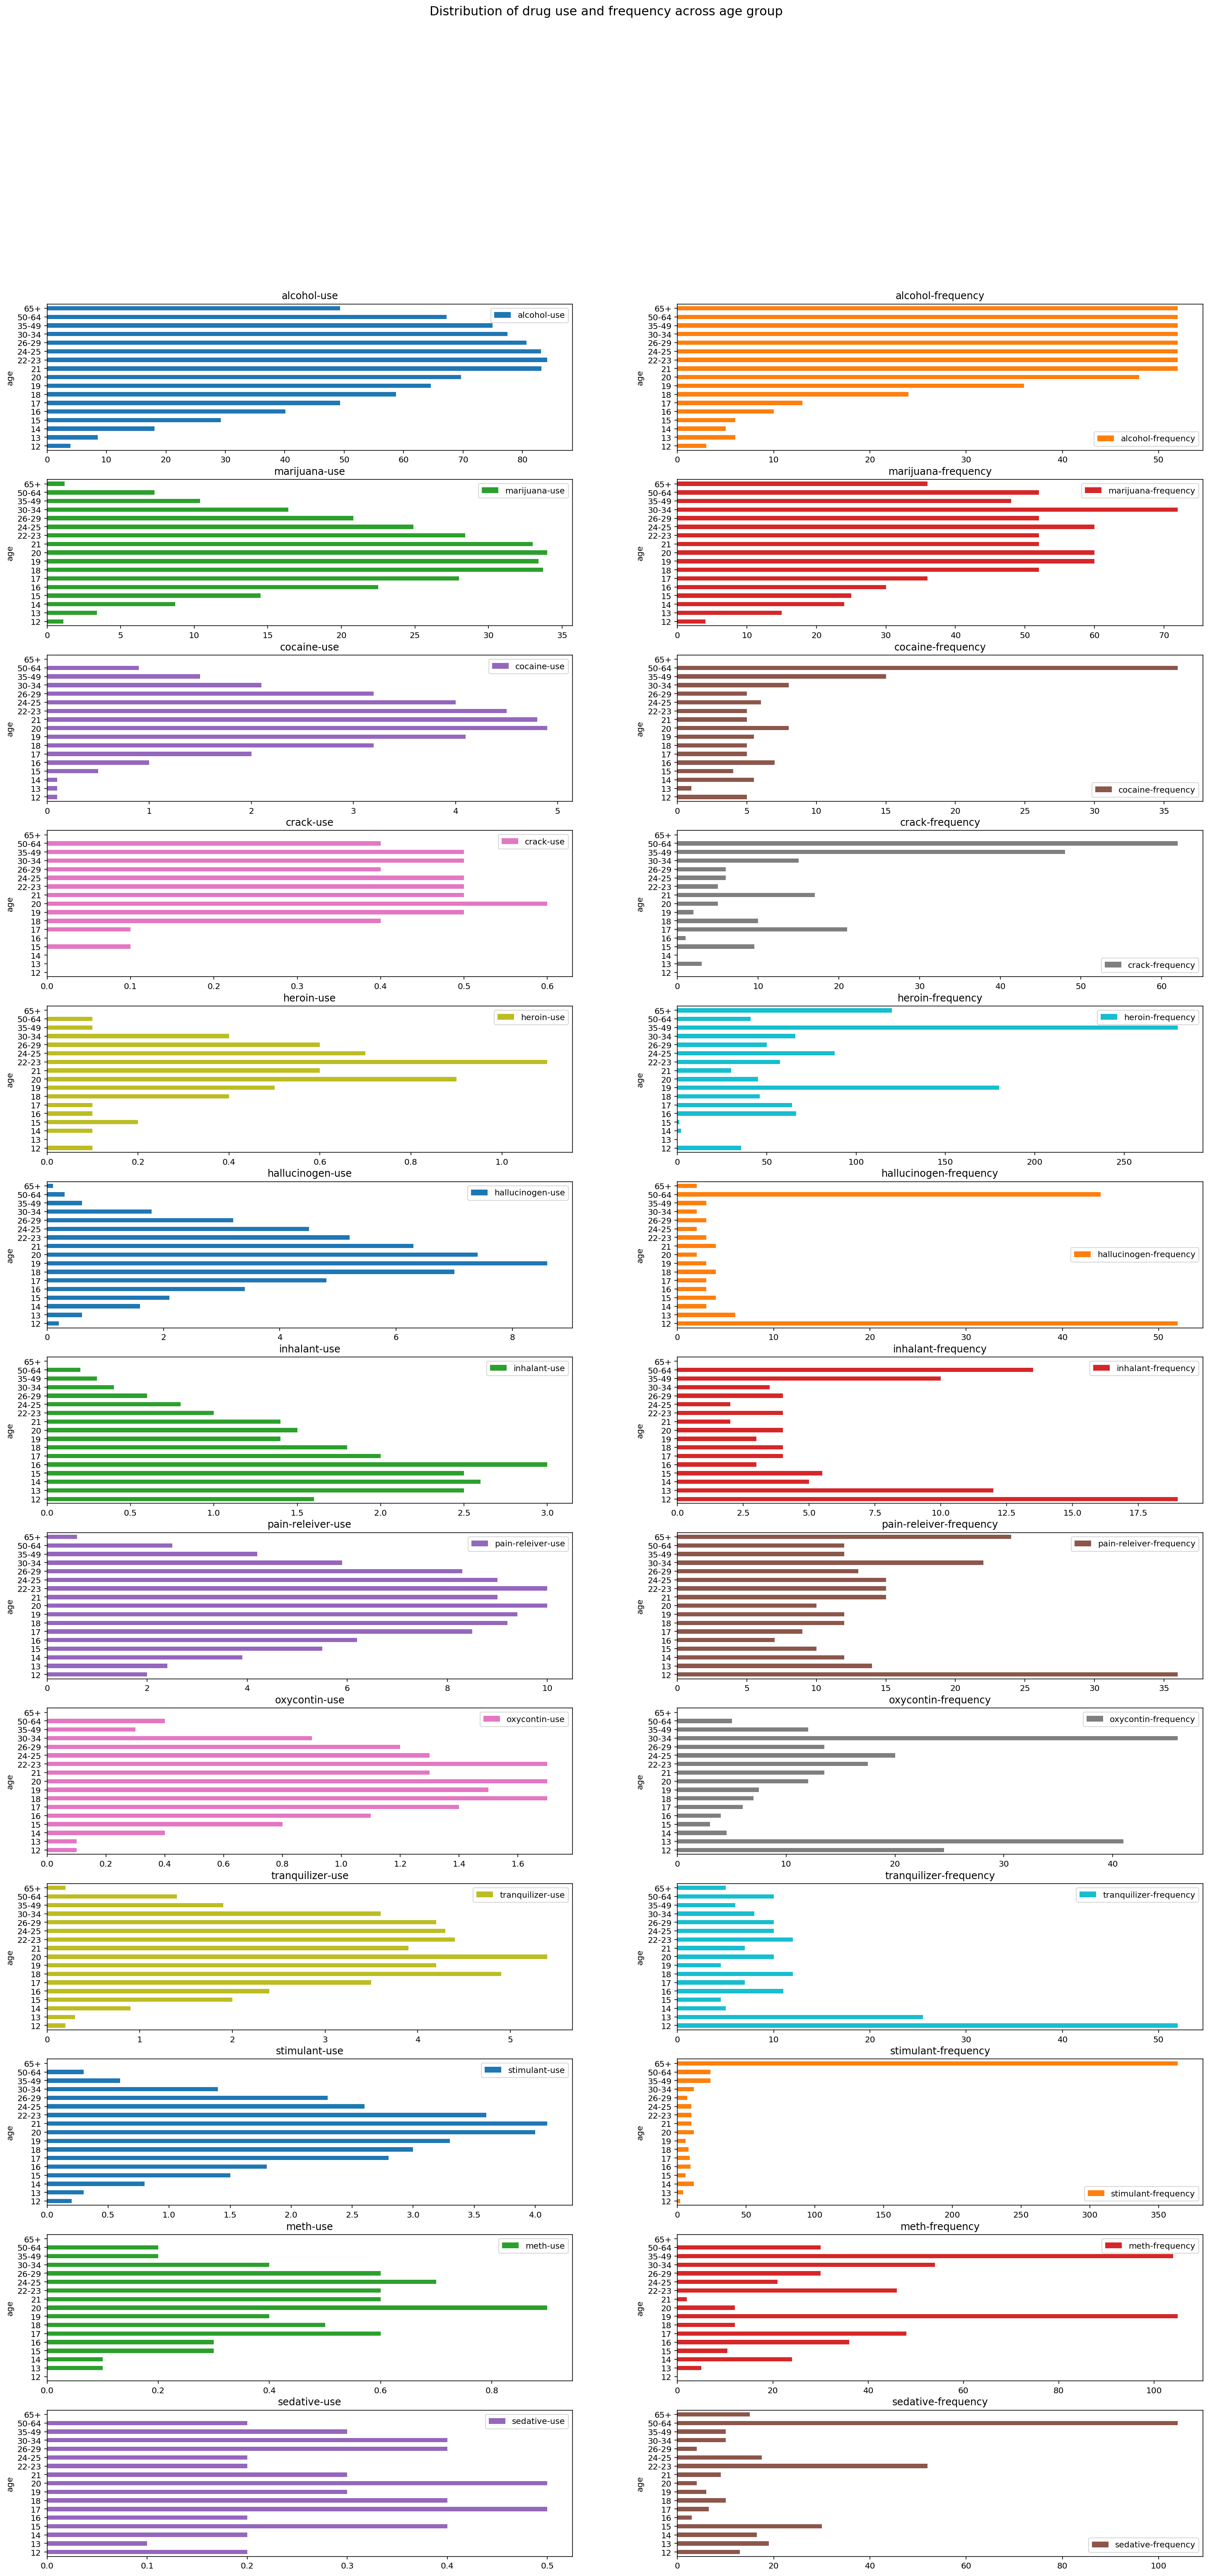

In [29]:
ax = drug_use.plot(kind='barh', x='age', y=drug_use.columns[3:], subplots=True, sharex=False, layout=(13,2), figsize=(25,50))
fig = ax[0][0].get_figure()
fig.suptitle('Distribution of drug use and frequency across age group', fontsize=15)
plt.show()

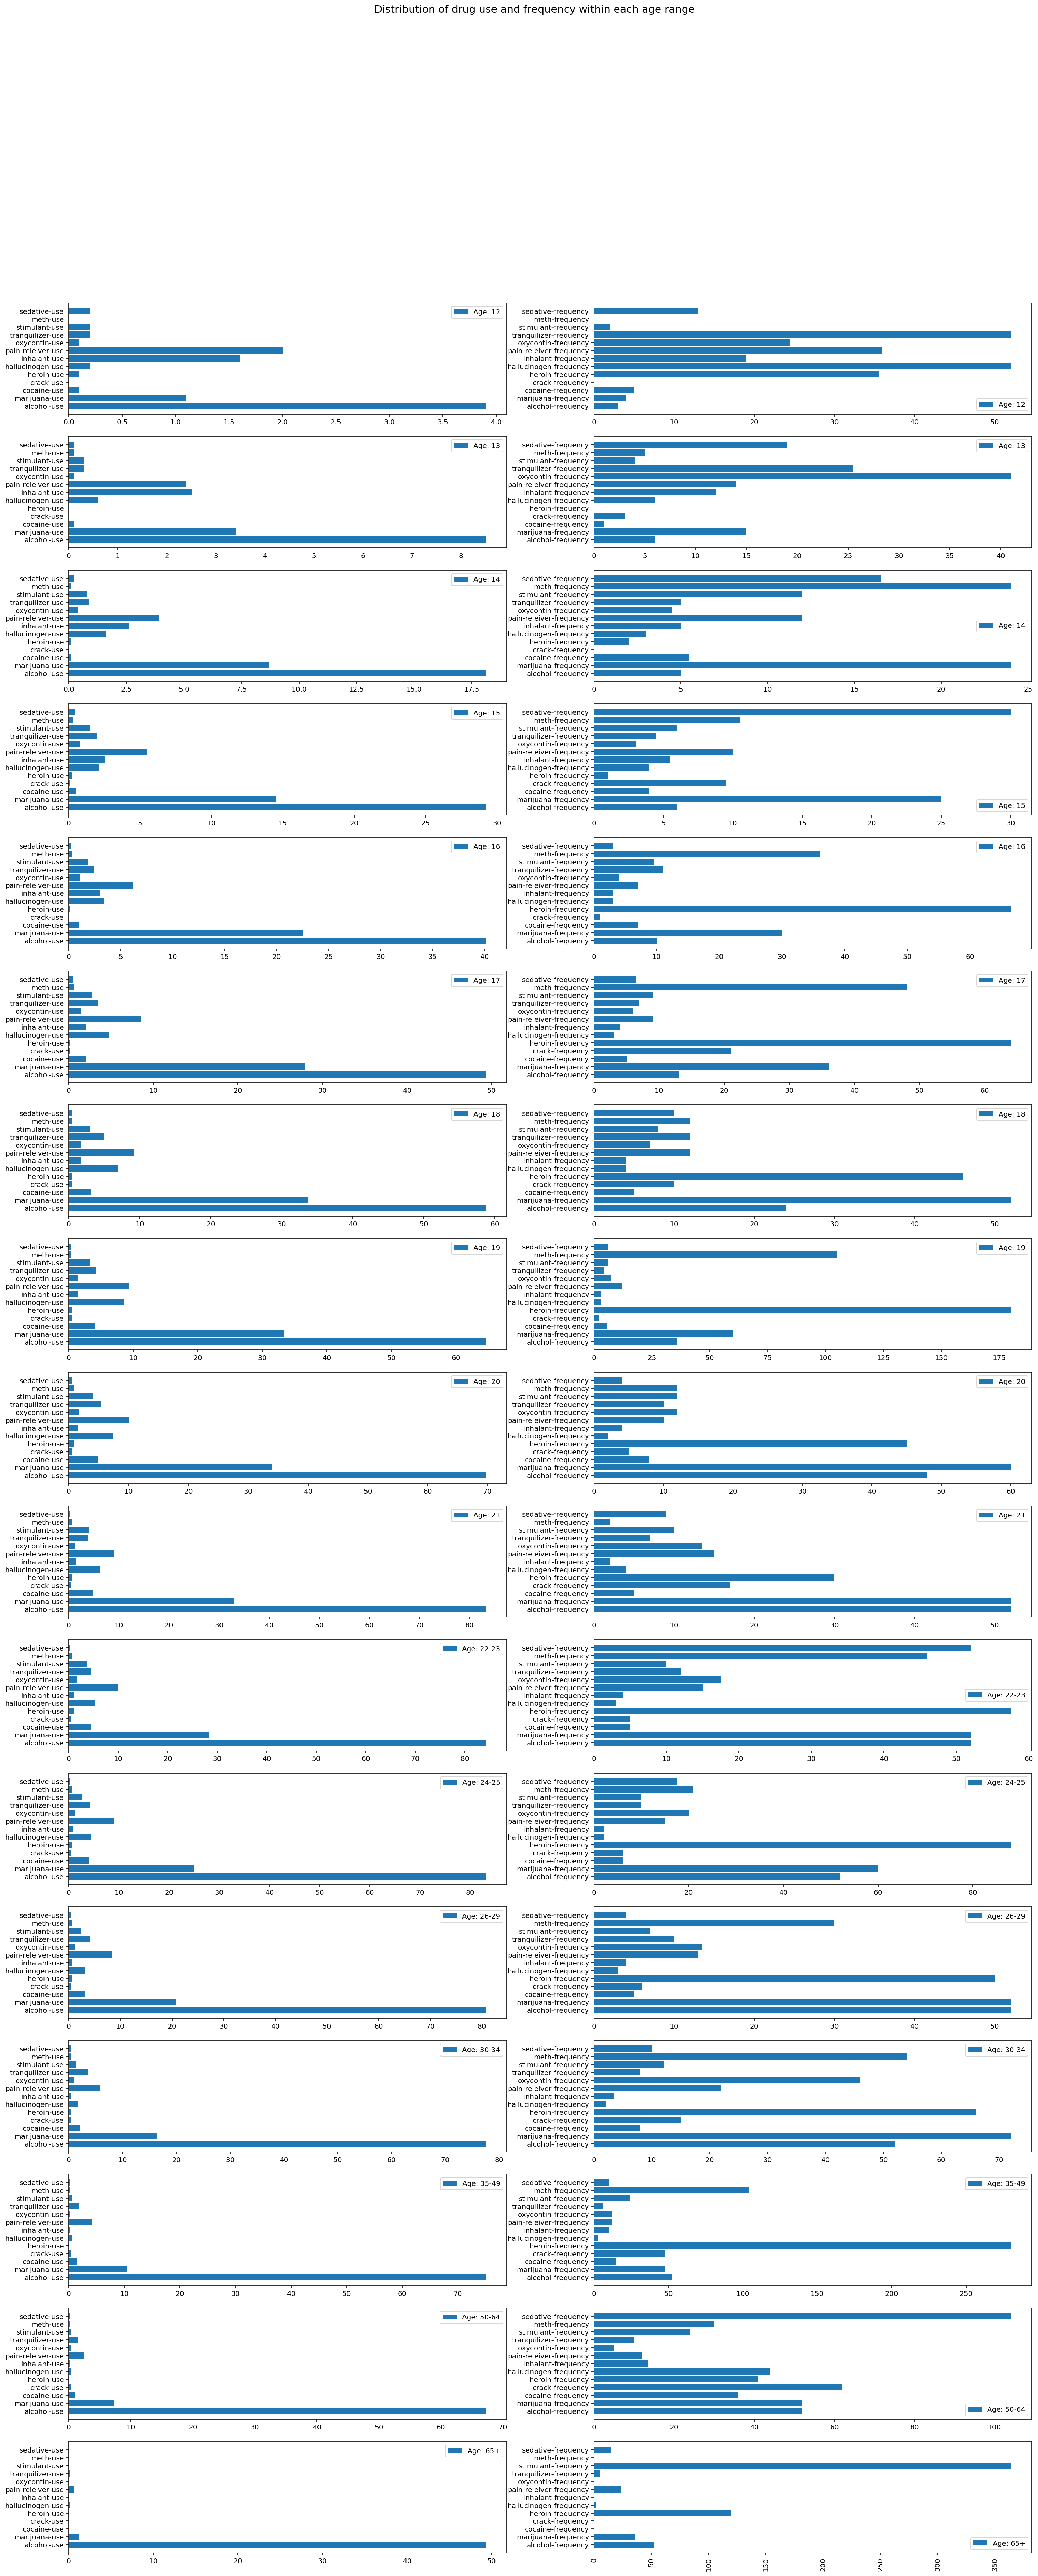

In [30]:
num_rows = 17
num_cols = 2
fig, ax = plt.subplots(num_rows,num_cols)
fig.suptitle('Distribution of drug use and frequency within each age range', fontsize=15)
fig.set_size_inches(25,60)
usage = drug_use.columns[3::2]
freq = drug_use.columns[4::2]
plt.xticks(rotation=90)
for i in range(num_rows):
    ax[i][0].barh(usage, drug_use.loc[i,usage], label=f"Age: {drug_use['age'][i]}")
    ax[i][0].legend()
    ax[i][1].barh(freq, drug_use.loc[i,freq], label=f"Age: {drug_use['age'][i]}")
    ax[i][1].legend()

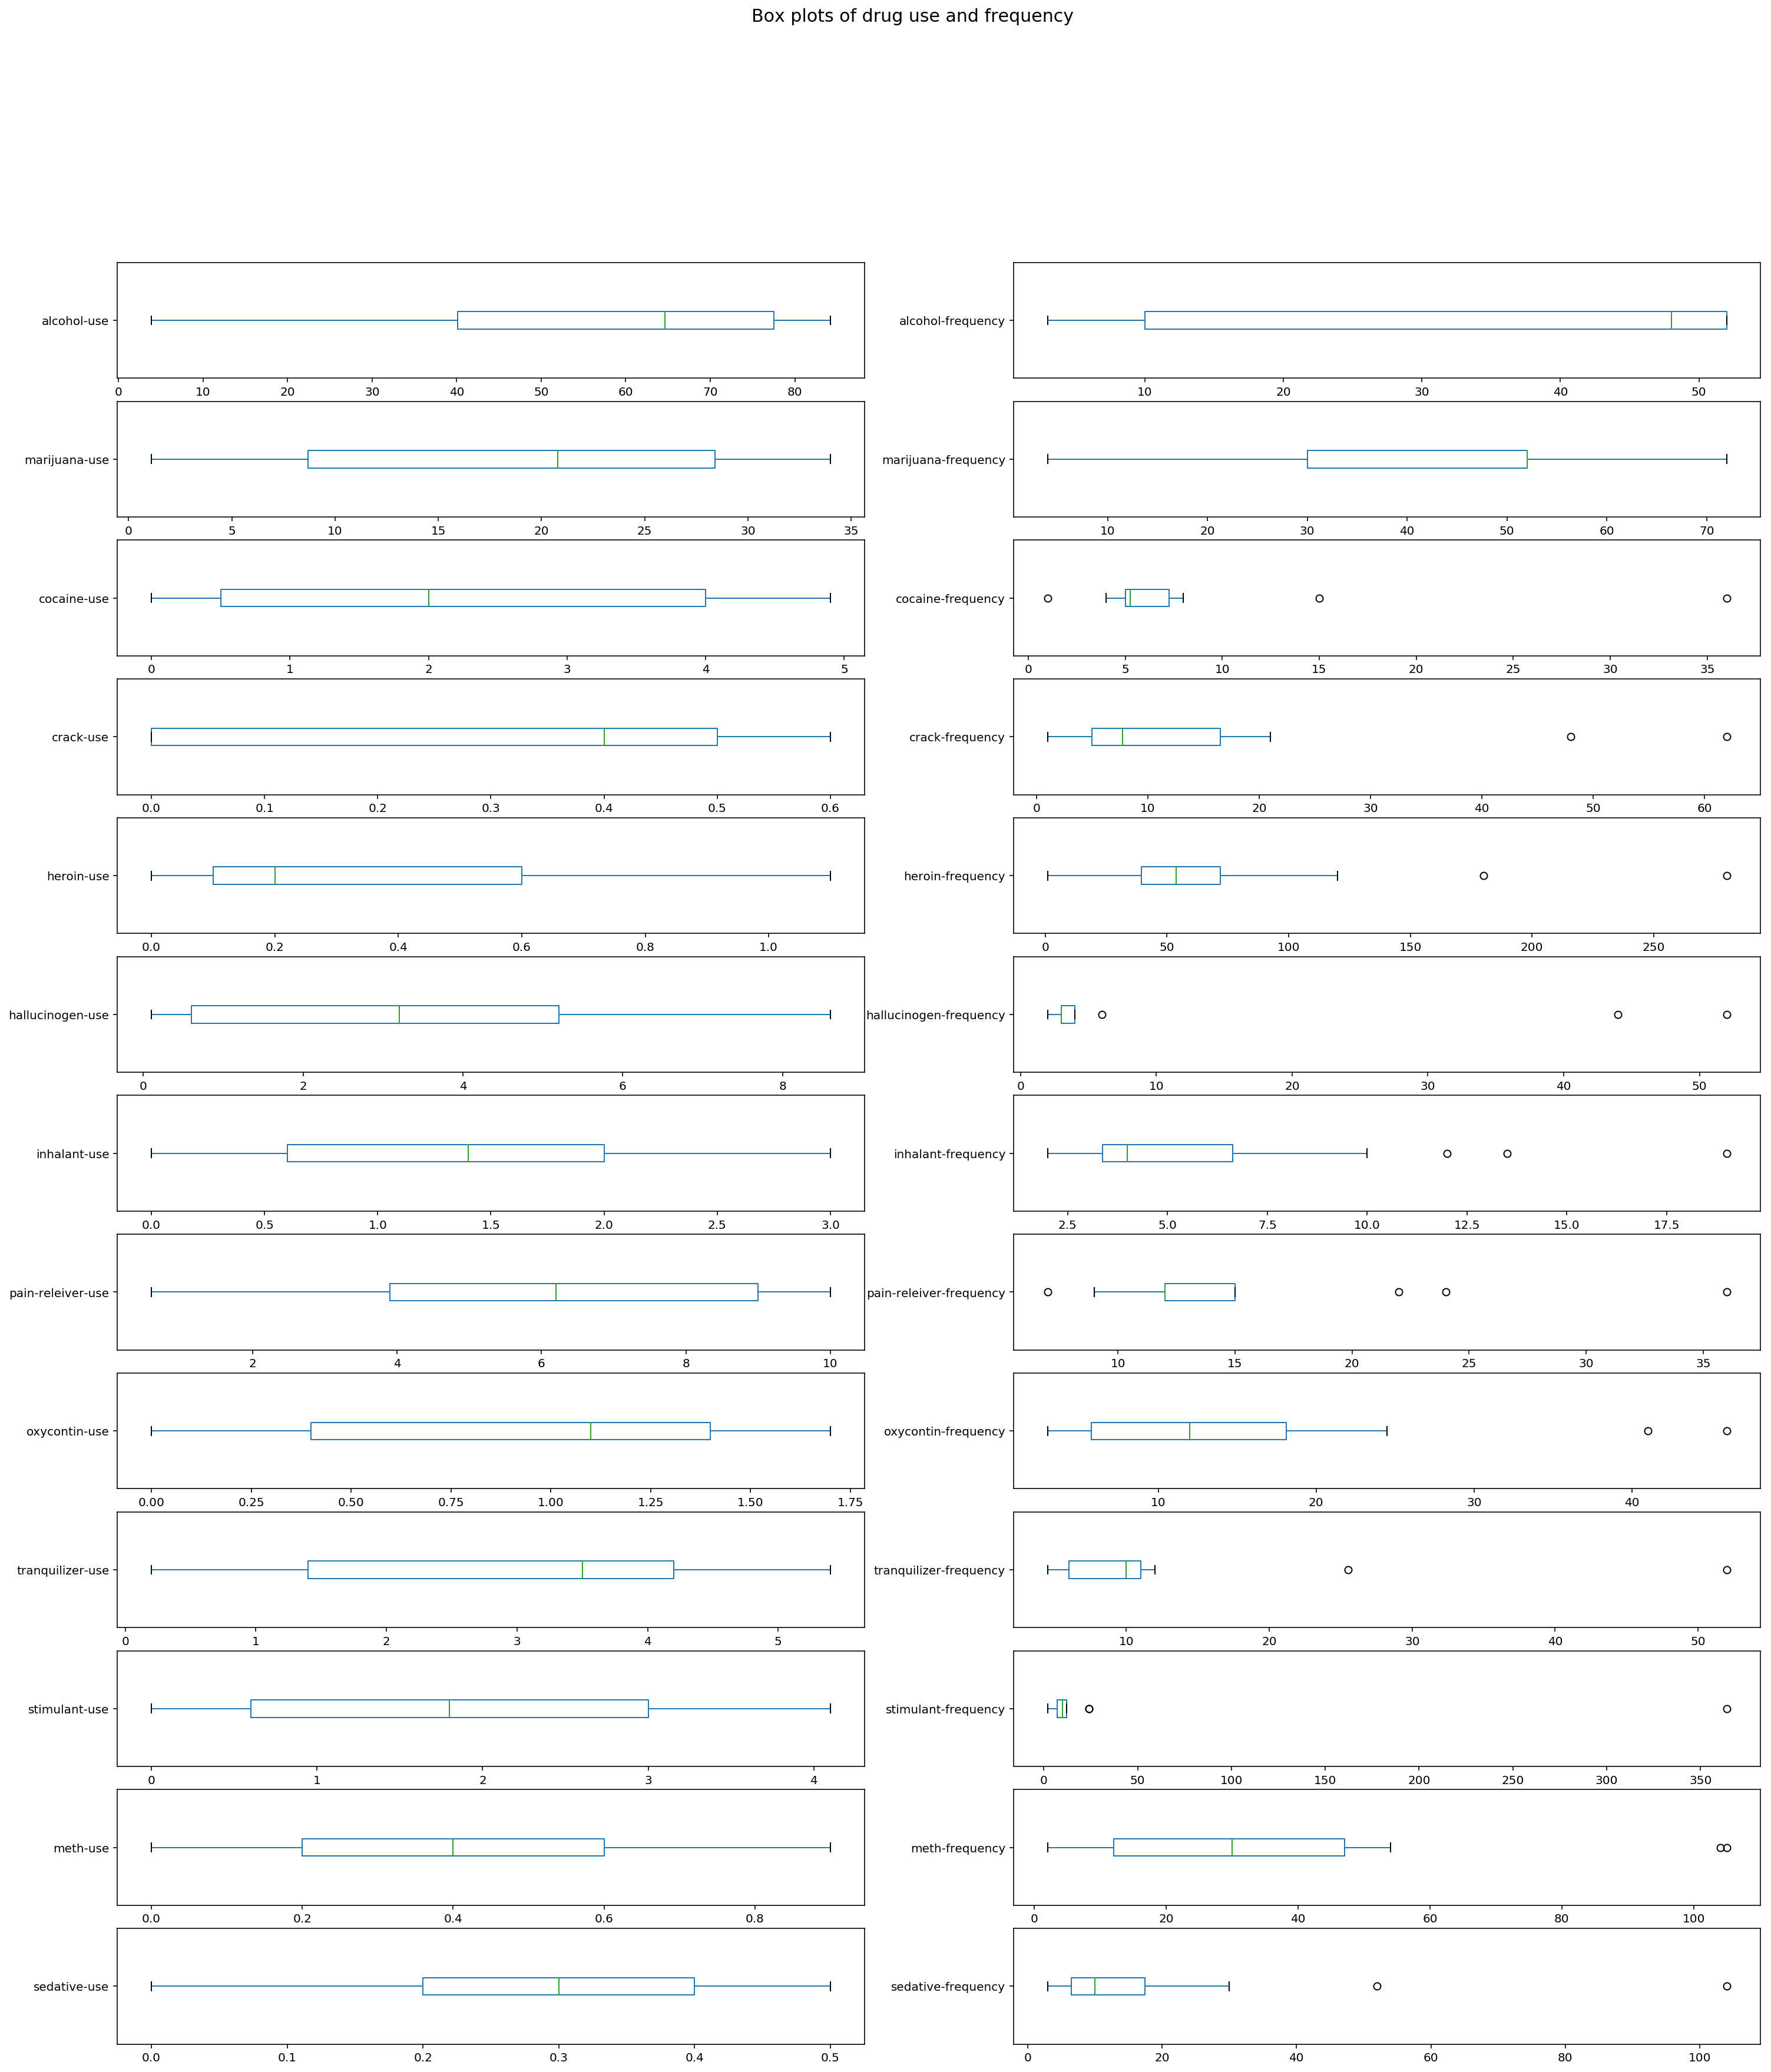

In [31]:
ax = drug_use.plot(kind='box', y=drug_use.columns[3:], subplots=True, sharex=False, layout=(14,2), figsize=(25,30), vert=False)
fig = ax[0].get_figure()
fig.suptitle('Box plots of drug use and frequency', fontsize=15)
plt.show()

<h4><i><b>Answer:</b></i></h4>
    
* Top 2 drugs consumed: Alcohol and marijuna (Probably due to the fact that it is legal and readily available).
* Alcohol-use: The percentage of people who consume alcohol increases steadily until it reaches peak at age 21 (legal age to buy alcohol)
* Marijuna, cocaine, hallucinogen, pain releiver, oxycontin, tranquilizer, stimulant and meth use: They have similar distribution (although the percentage is different). The percentage of people who consume these drugs rise and peak at about age 20 or 21 then decreases.
* Crack-use: The percentage is generally low across all ages.
* Inhalant-use: More prevalent among the young people.
* Alcohol and marijuna frequency: They have similar trend - rises and remains quite constant
* Abormonally high frequency for cocaine and crack for ages above 49. These are corroborated as outliers in the boxplot.
* Abormonally high frequency for hallucinogen for ages 12 and 50-64. These are corroborated as outliers in the boxplot.
* Other drug frequencies also exhibit unusually high values in some age ranges. These are reflected as outliers in the boxplot.
* There are oddities in the frequency data: the frequency is non-zero even when the percentage of respondents using the drug is zero. (Some of the frequencies are marked as '-' when the percentage is zero which makes sense.)
* Looking at each age group, the usage frequency of each drug seems to vary quite differently. Furthermore, there are quite a few outliers in the frequency as seen from the box-plots.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

<h4><i><b>Answer:</b></i></h4>

**Question:** Is there a relationship between the usage of different pairs of drugs?

**Deliverables:** 
1. Calculation of the correlation between the percentage of users in different drug pairs
2. Calculation of the correlation between the frequency of consumption in different drug pairs
3. Analysis of the correlation values to determine the existence of a linear relationship

In [32]:
# Code
# Clean up unusual frequency values when the drug use is zero
for i in range(3,drug_use.shape[1],2):
    mask = [True if value == 0 else False for value in drug_use.iloc[:, i]]
    freq_col = drug_use.iloc[:, i+1]
    freq_col[mask] = np.nan

usage_df = drug_use.iloc[:, 3::2]
freq_df = drug_use.iloc[:, 4::2]
usage_corr = usage_df.corr()
freq_corr = freq_df.corr()

/Users/joshuamei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Visualization of the relationship between pairs of percentage of drug users**

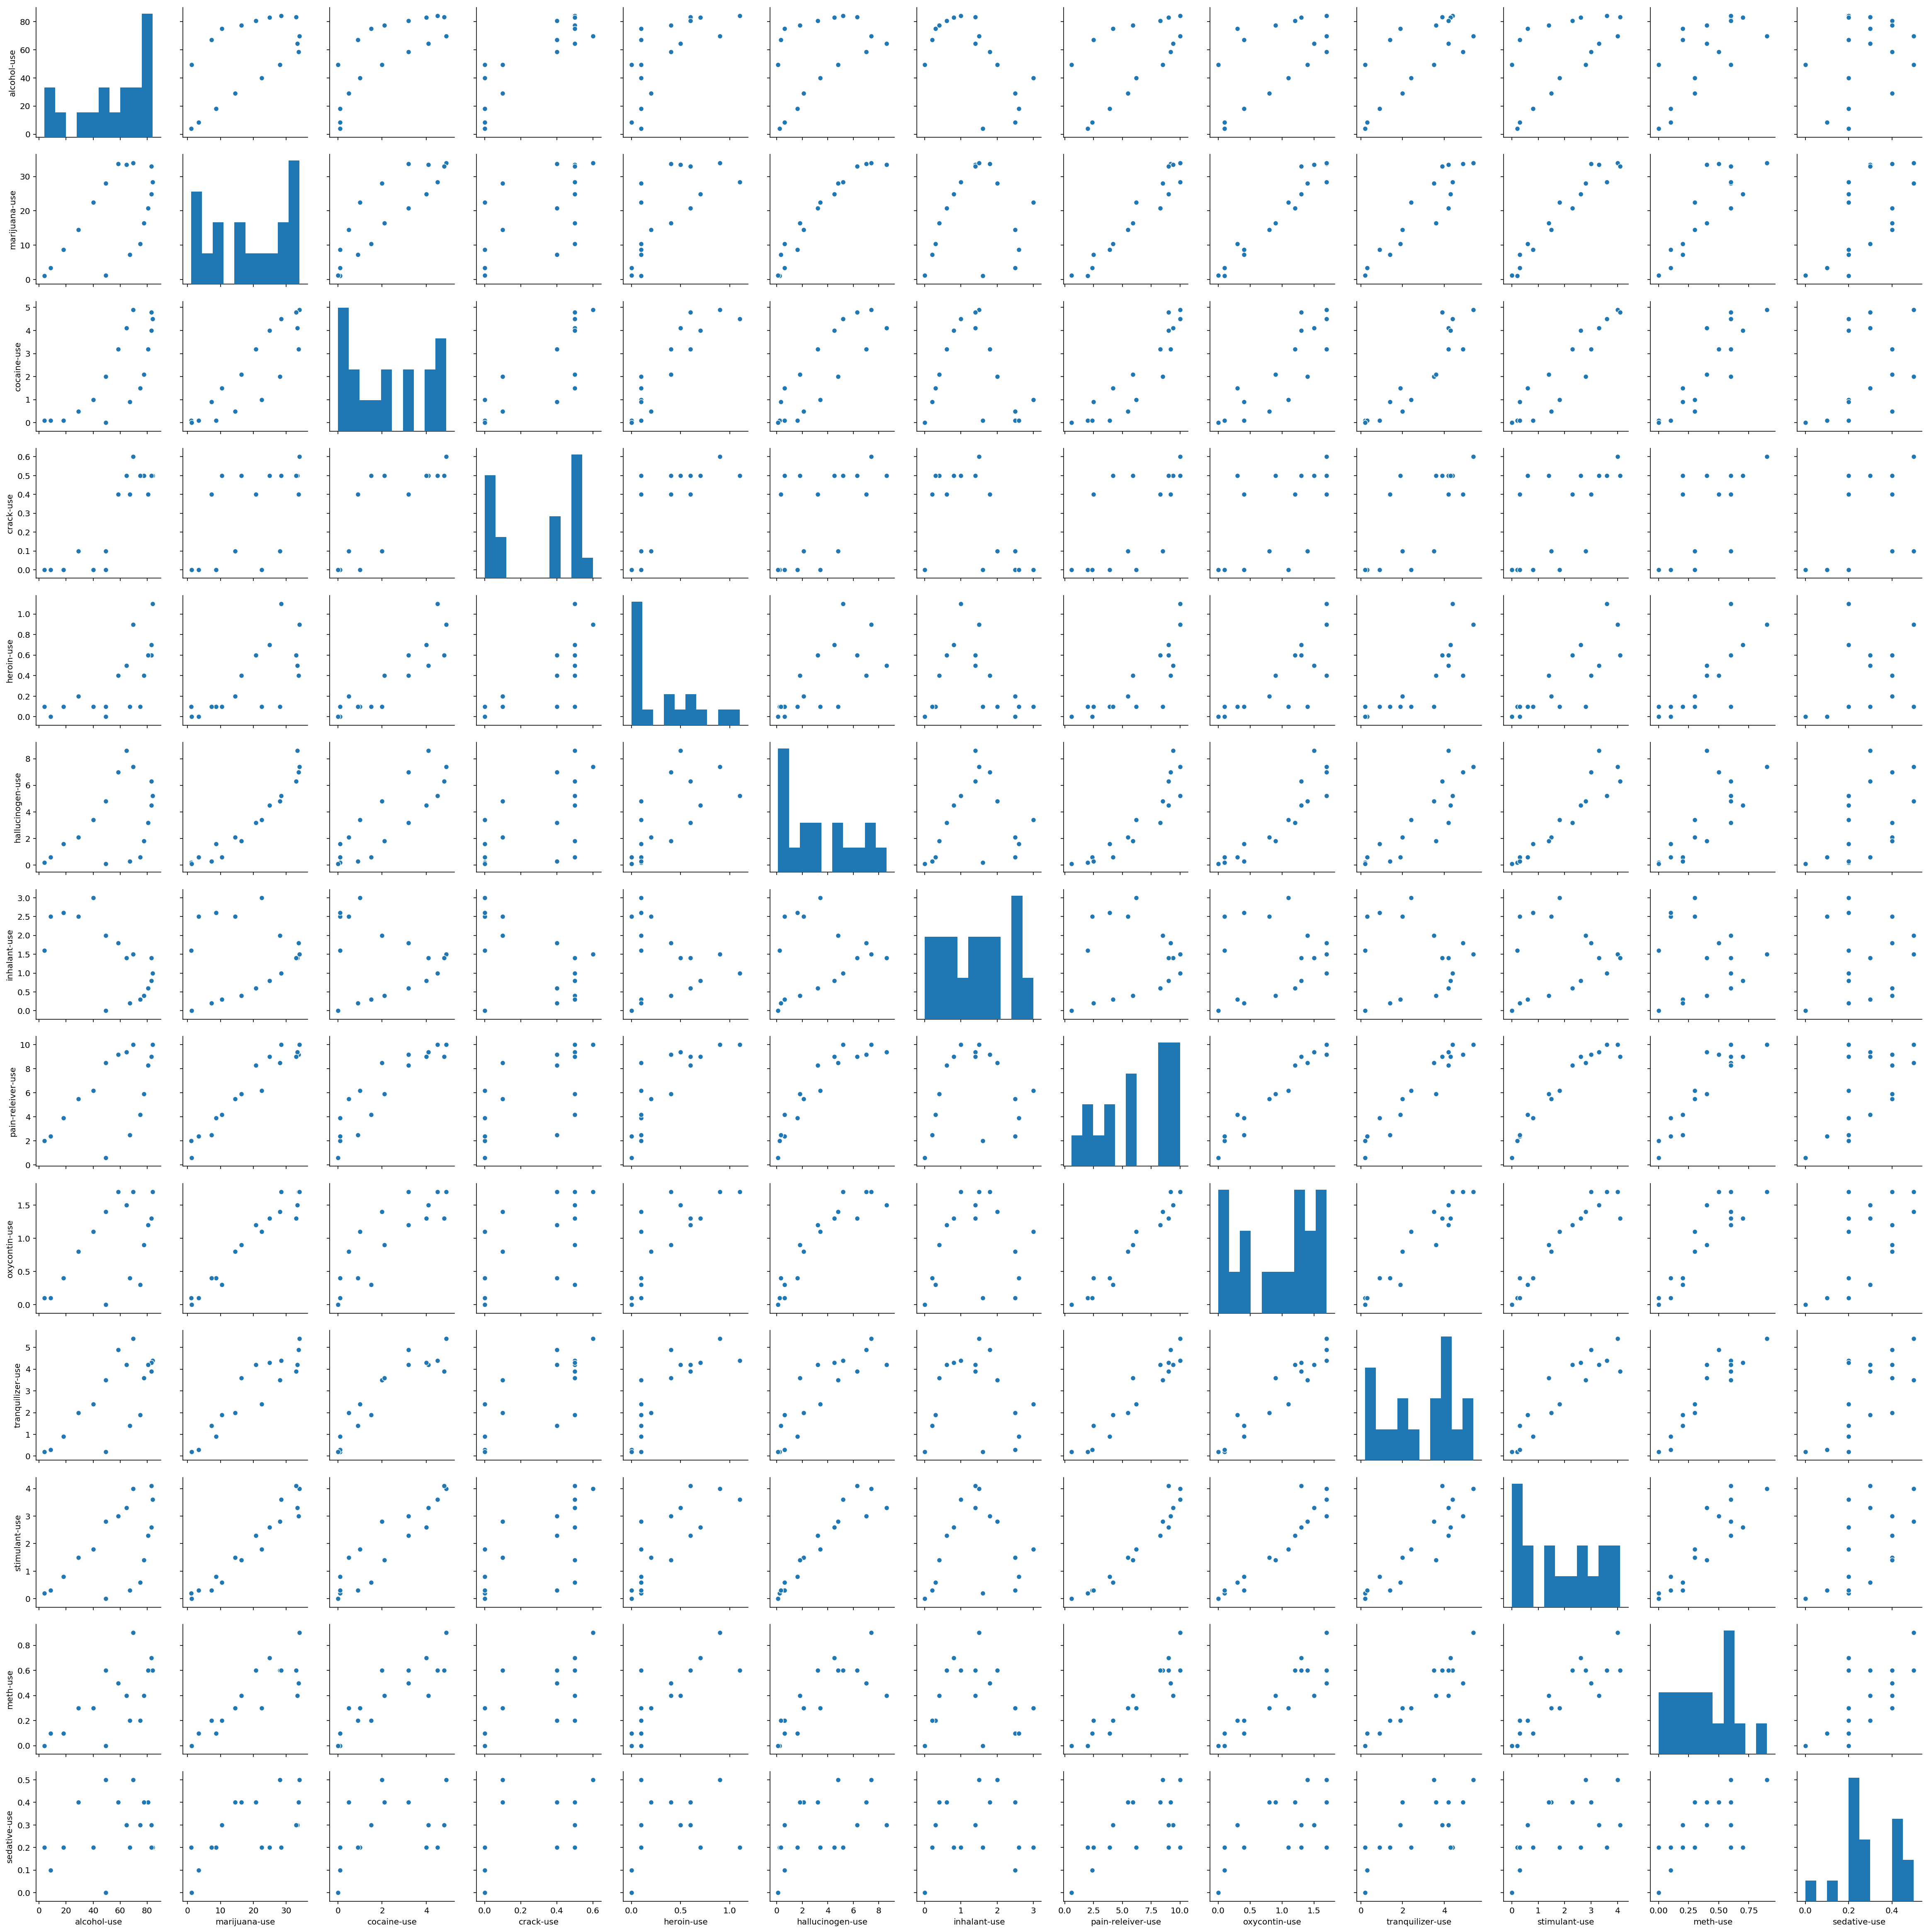

In [33]:
sns.pairplot(usage_df)
plt.show()

**Visualization of the percentage of drug users correlation values in a heatmap**

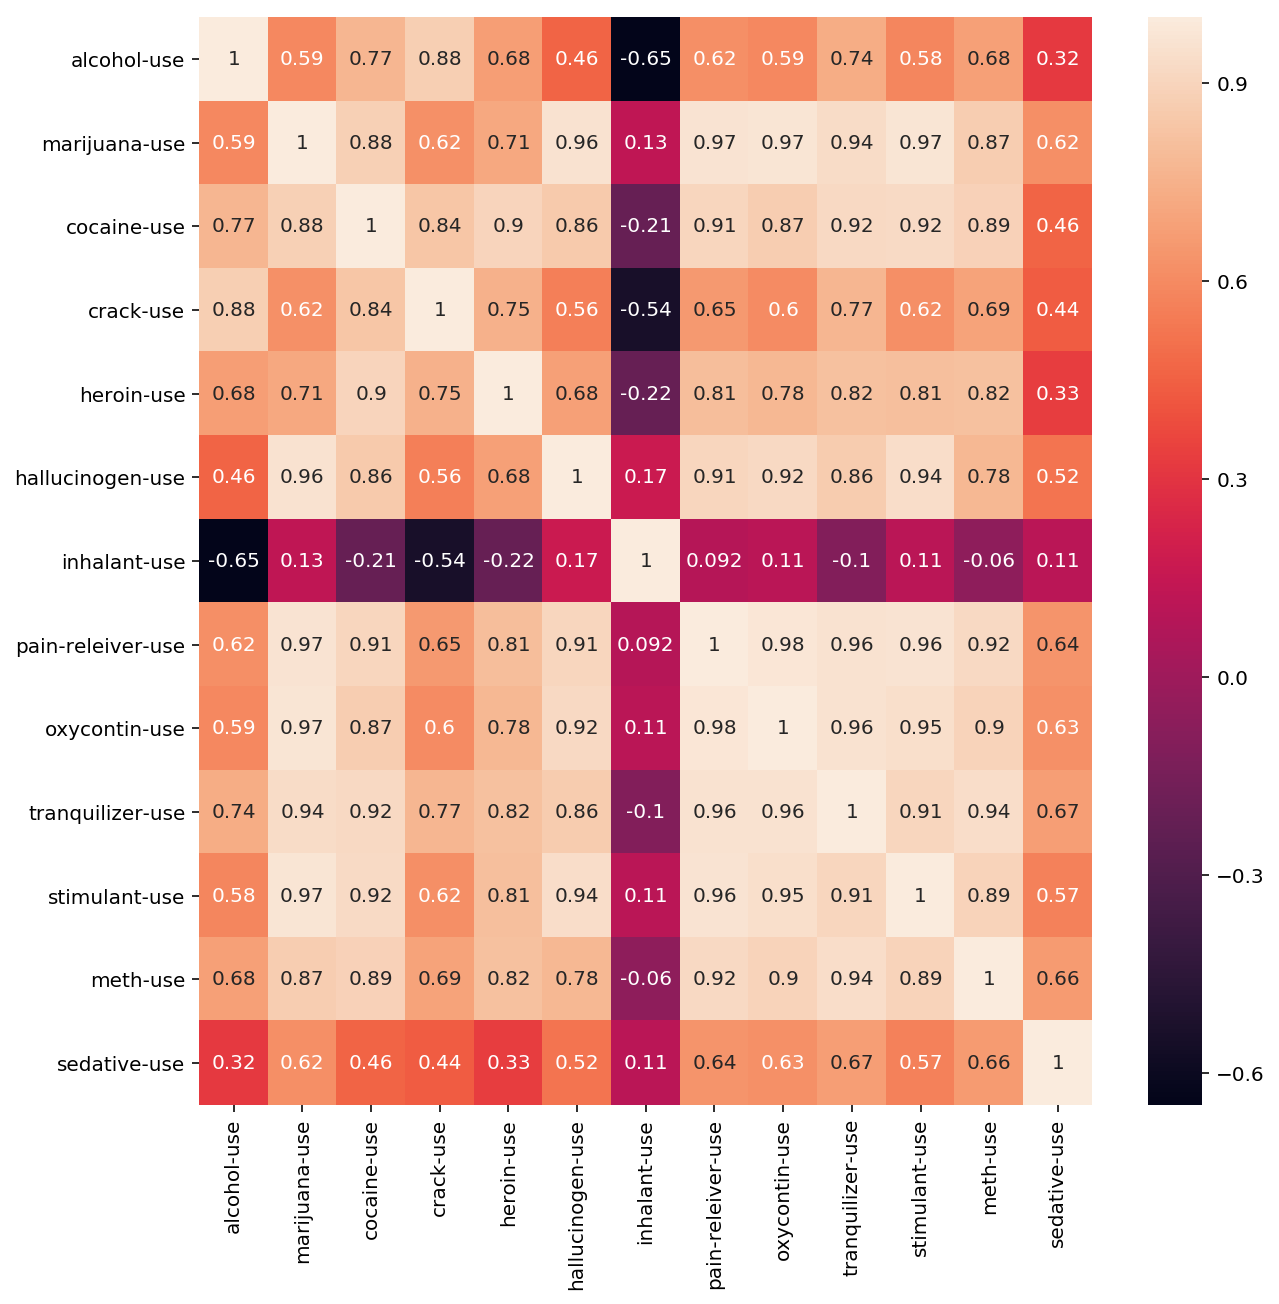

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(usage_corr, annot=True)
plt.show()

**Visualization of the relationship between pairs of drug frequencies**

/Users/joshuamei/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/joshuamei/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


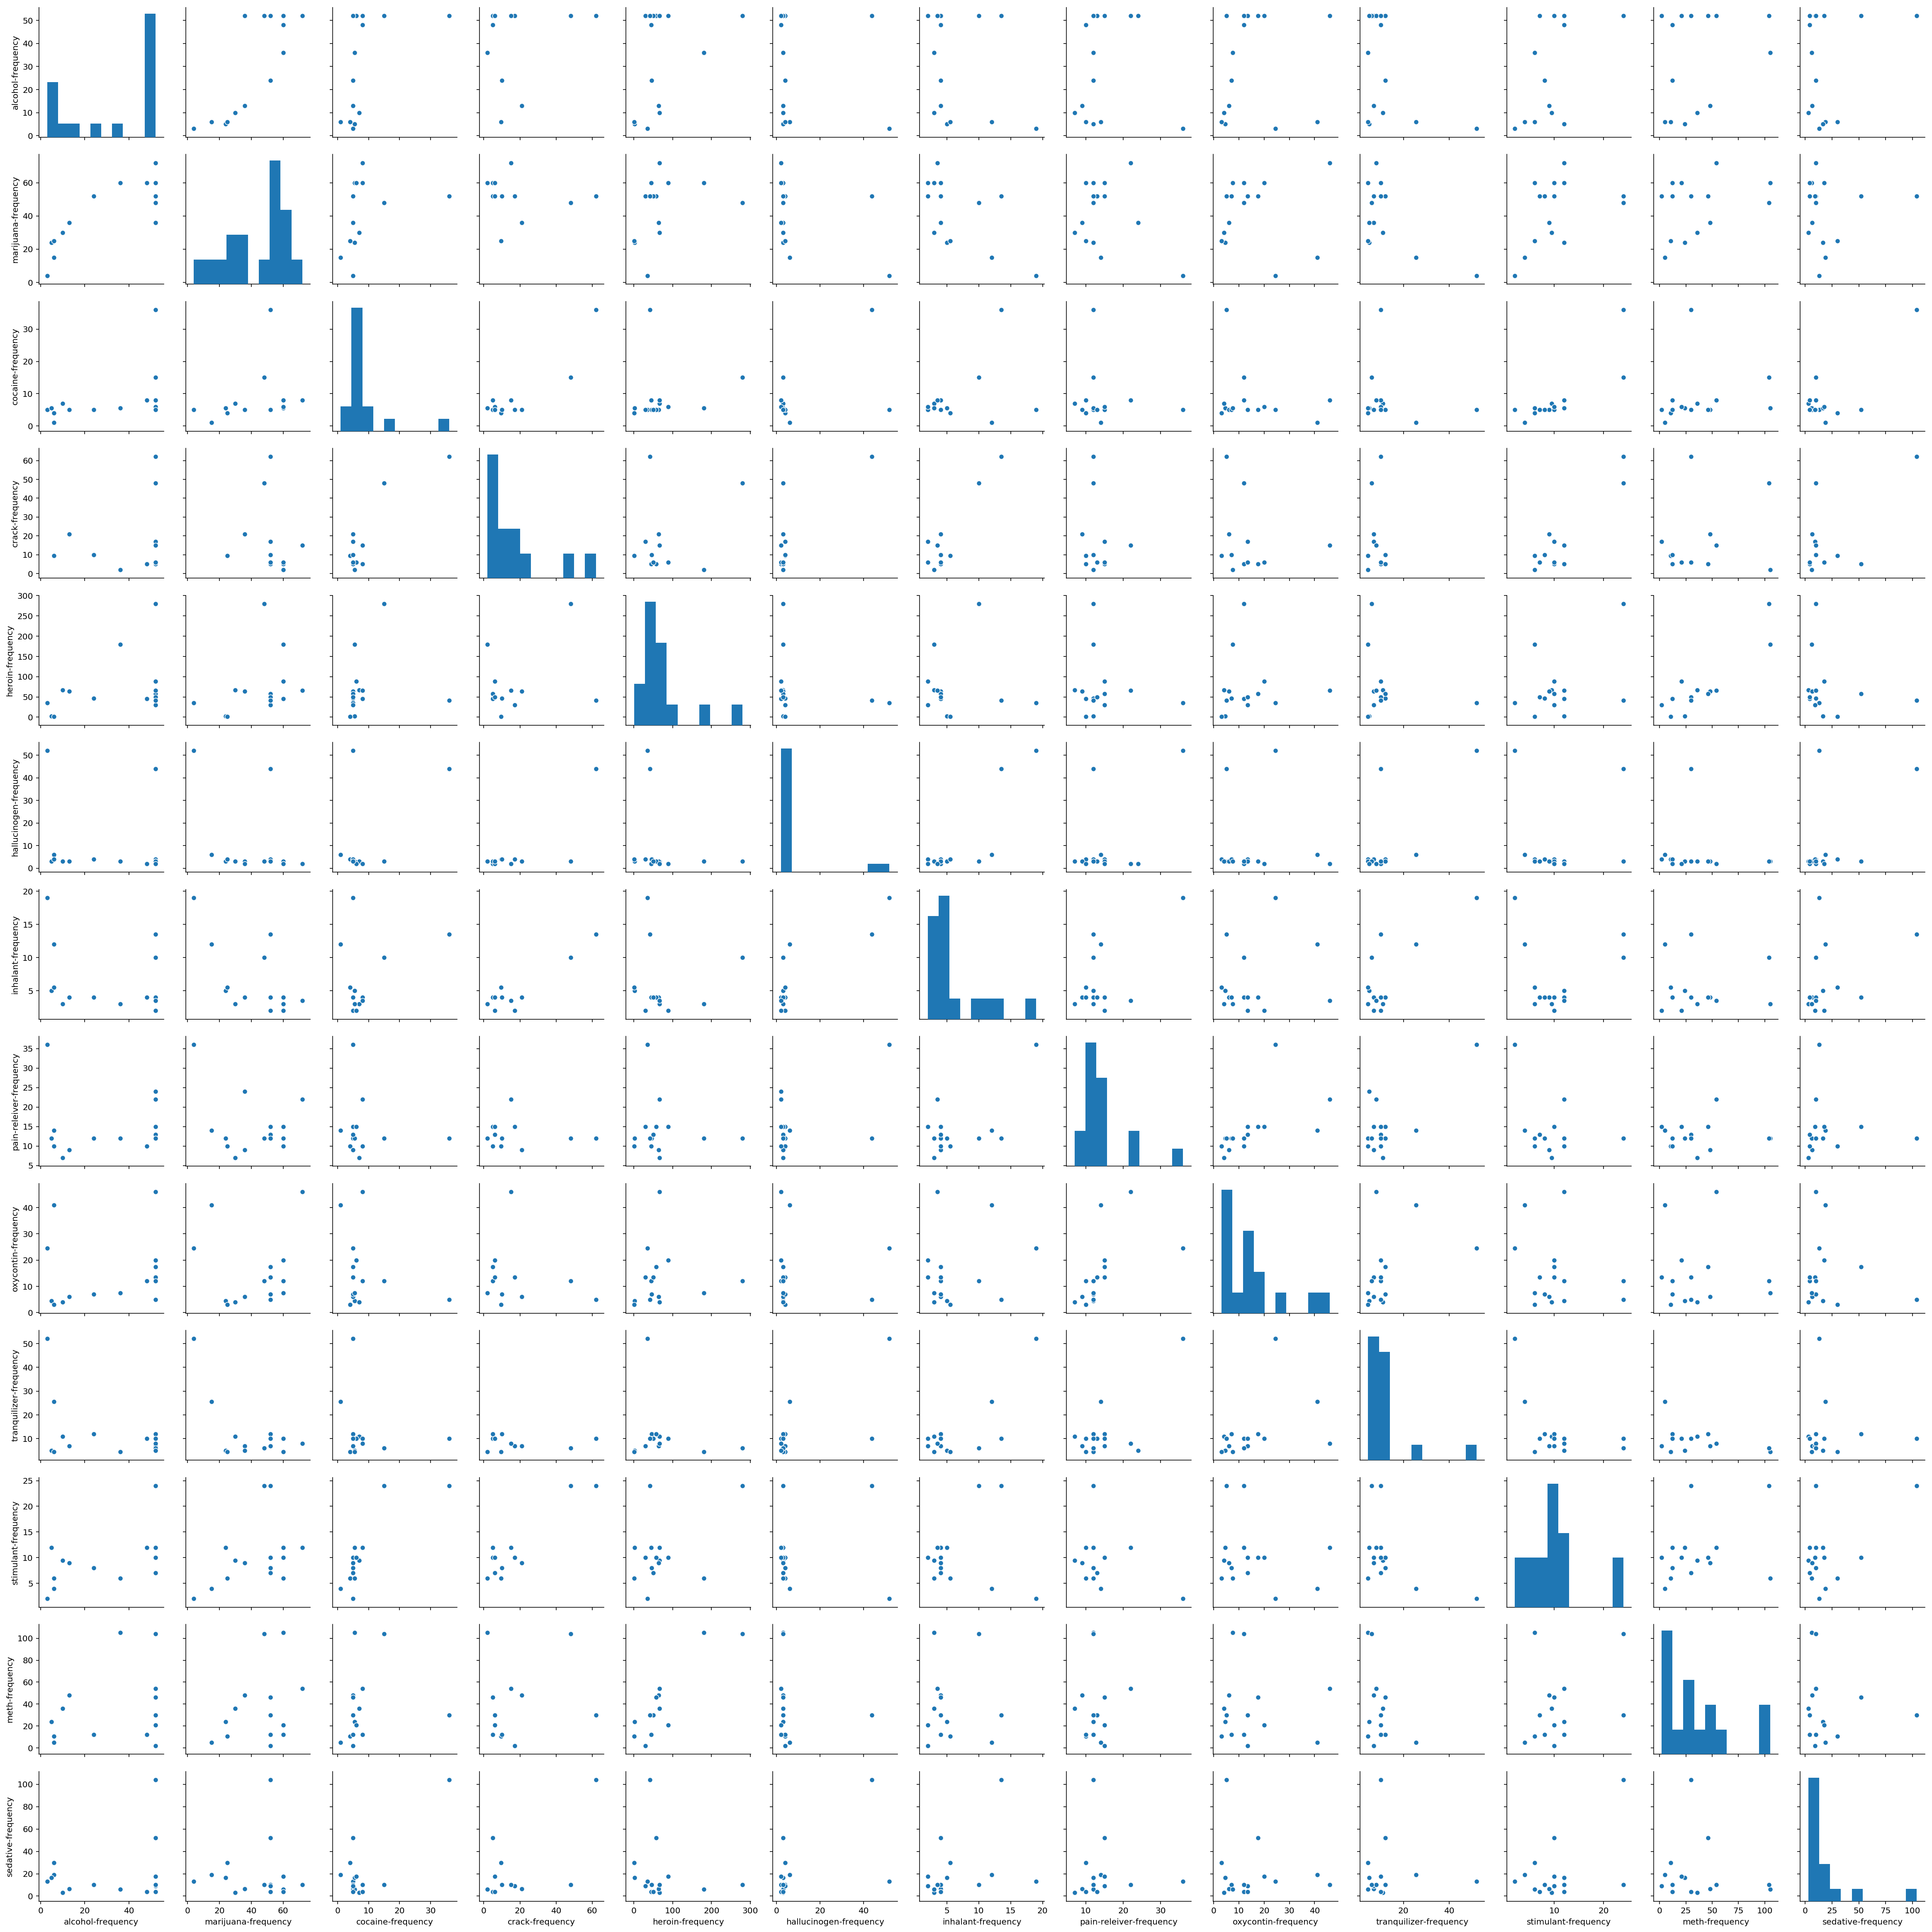

In [35]:
sns.pairplot(freq_df)
plt.show()

**Visualization of the drug frequency correlation values in a heatmap**

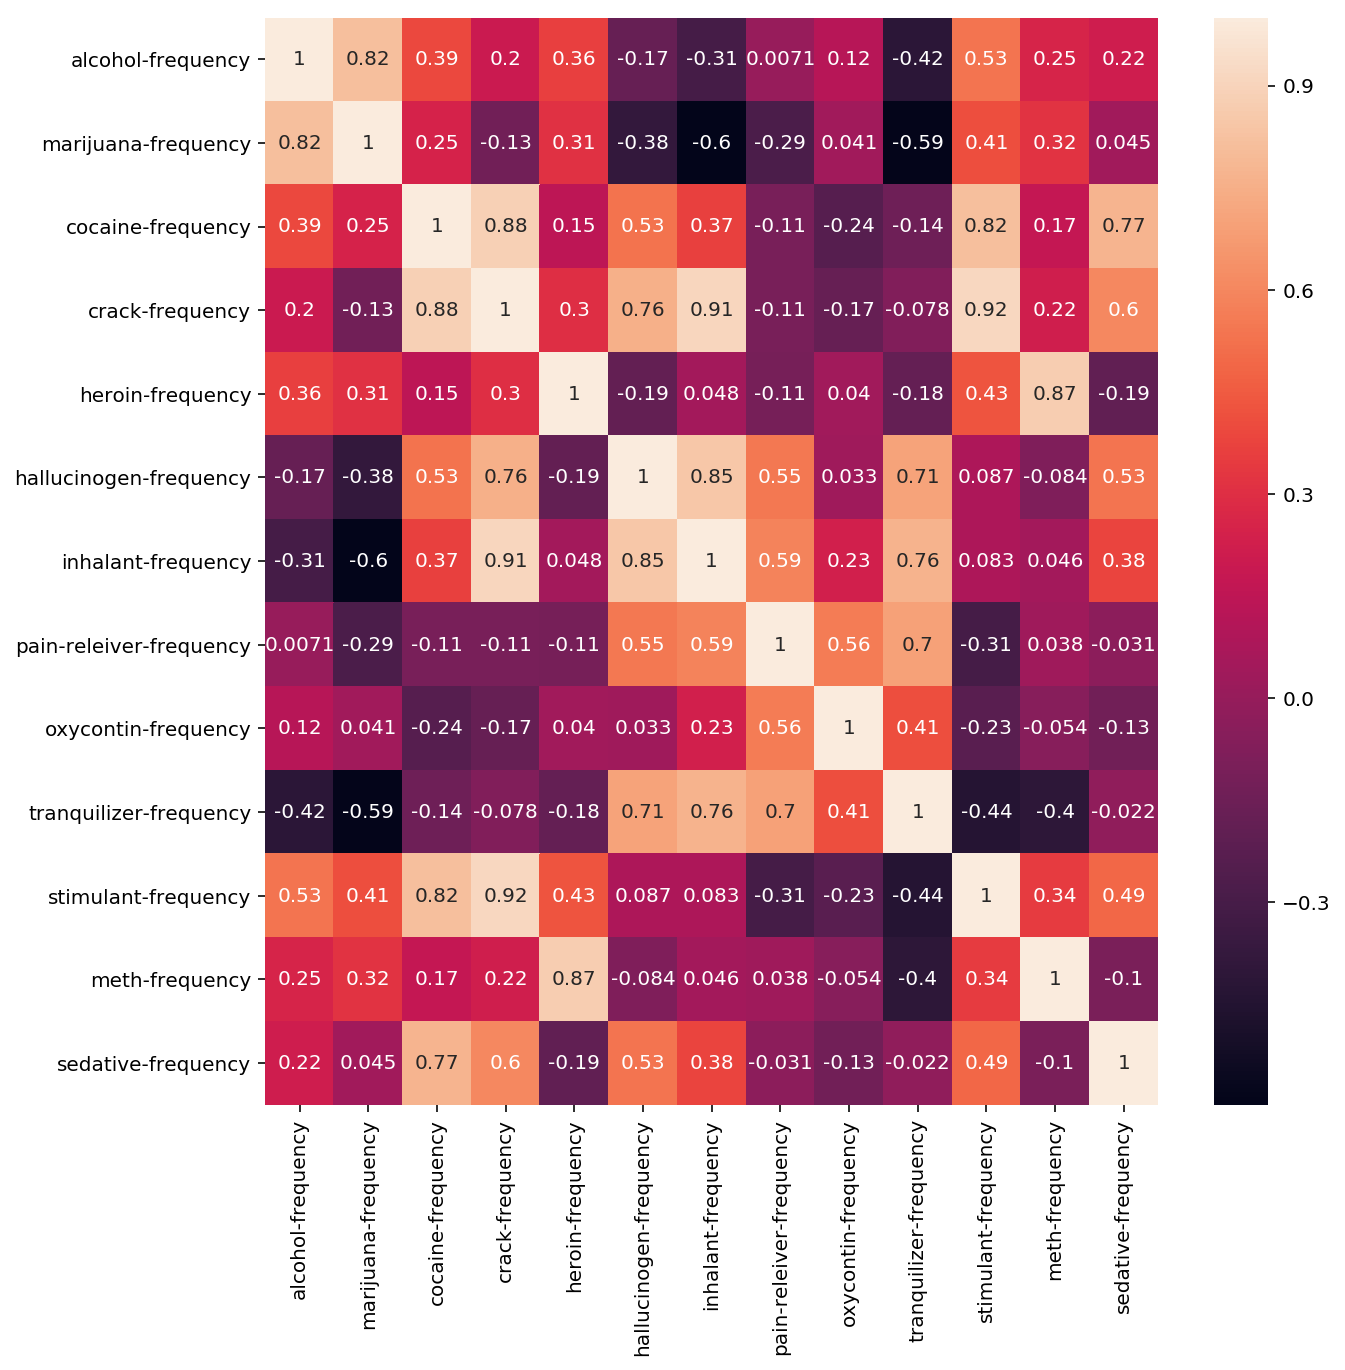

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(freq_corr, annot=True)

**Comparing correlation values after removing outliers from cocaine, crack and stimulant frequencies**

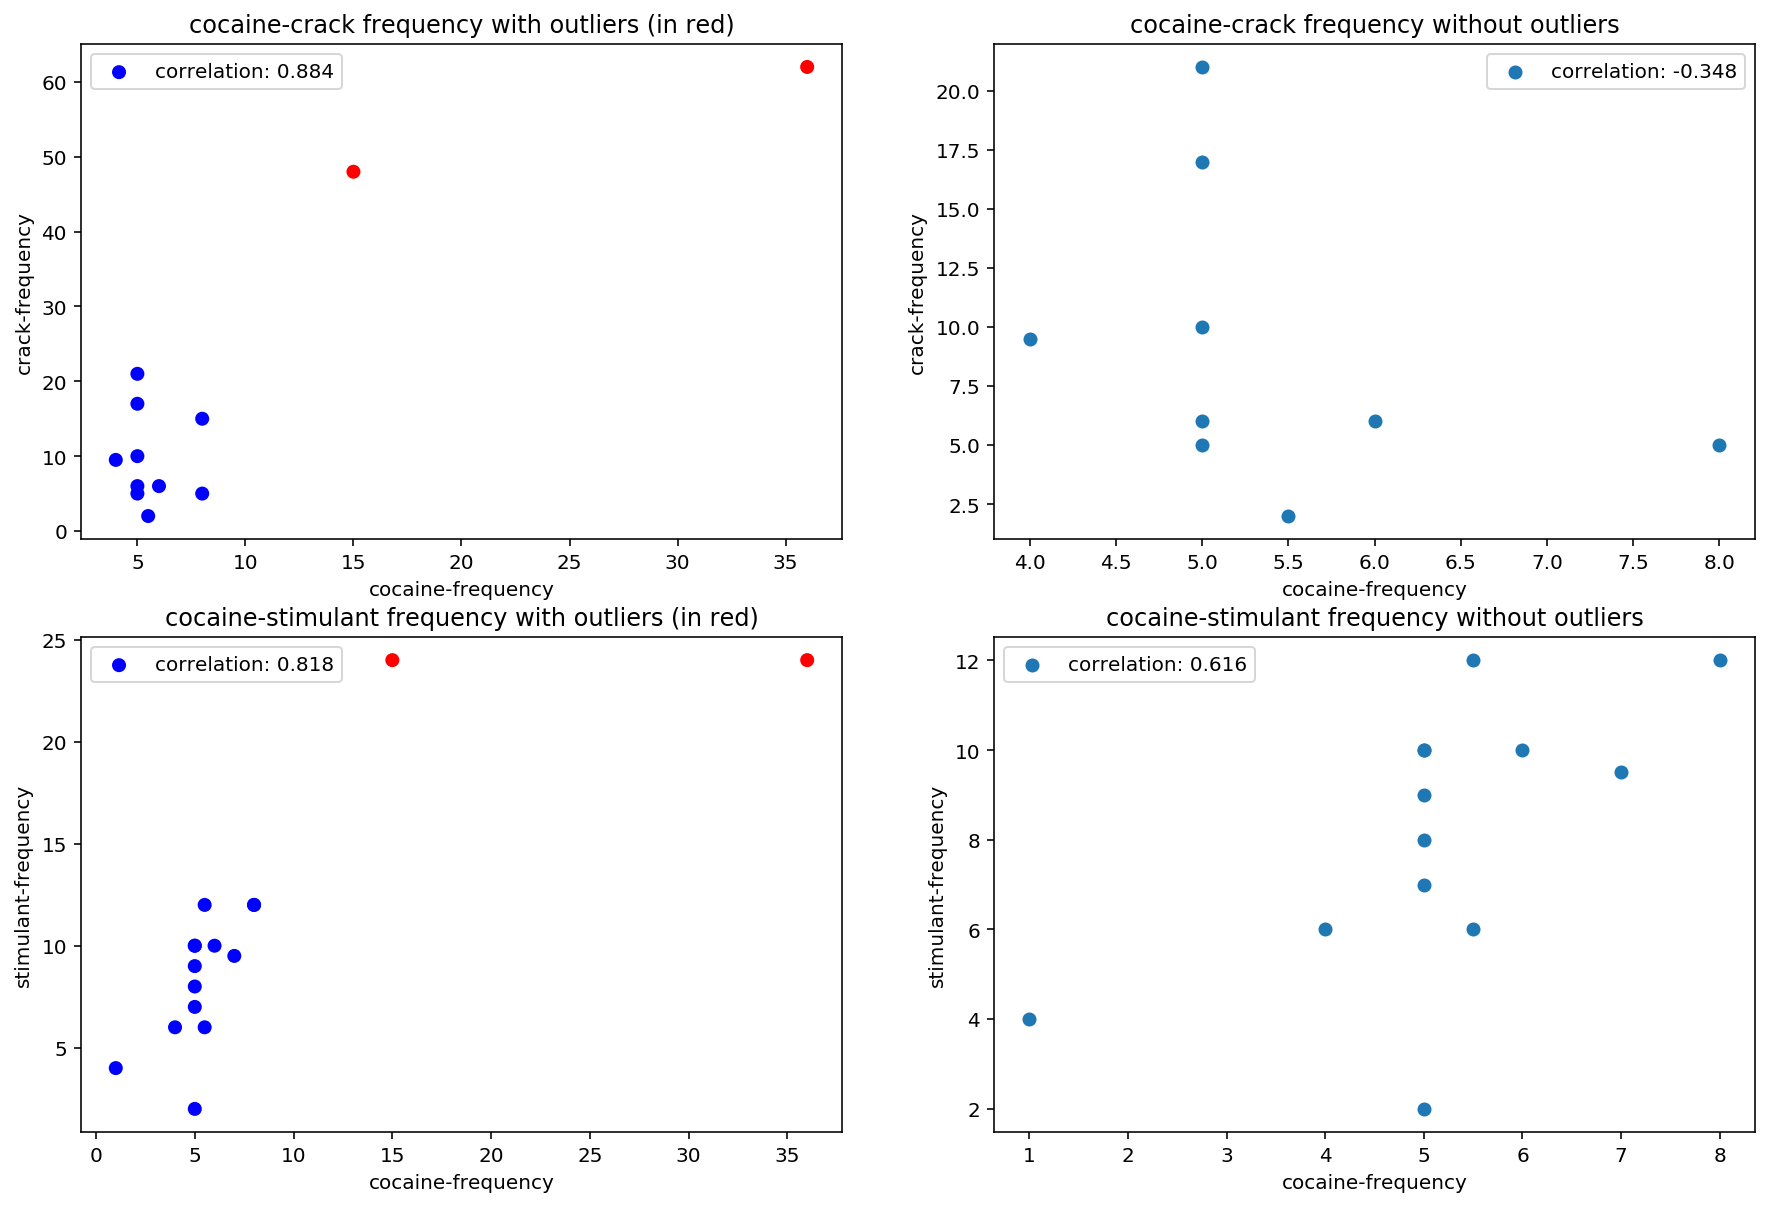

In [37]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

cocaine_crack_freq = freq_df[['cocaine-frequency','crack-frequency']].dropna()
corr = np.corrcoef(x=cocaine_crack_freq['cocaine-frequency'], y=cocaine_crack_freq['crack-frequency'])[0][1].round(3)
color = ['b' for i in range(10)]
color.extend(['r','r'])
ax[0][0].scatter(cocaine_crack_freq['cocaine-frequency'], cocaine_crack_freq['crack-frequency'], c=color, label=f"correlation: {corr}")
ax[0][0].set_title('cocaine-crack frequency with outliers (in red)')
ax[0][0].set_xlabel('cocaine-frequency')
ax[0][0].set_ylabel('crack-frequency')
ax[0][0].legend()

cocaine_crack_freq_no_outlier = cocaine_crack_freq.iloc[0:9, :]
cocaine_freq_no_outlier = cocaine_crack_freq_no_outlier['cocaine-frequency']
crack_freq_no_outlier = cocaine_crack_freq_no_outlier['crack-frequency']
new_corr = np.corrcoef(x=cocaine_freq_no_outlier, y=crack_freq_no_outlier)[0][1].round(3)
ax[0][1].scatter(cocaine_freq_no_outlier, crack_freq_no_outlier, label=f"correlation: {new_corr}")
ax[0][1].set_title('cocaine-crack frequency without outliers')
ax[0][1].set_xlabel('cocaine-frequency')
ax[0][1].set_ylabel('crack-frequency')
ax[0][1].legend()

cocaine_stimulant_freq = freq_df[['cocaine-frequency','stimulant-frequency']].dropna()
corr = np.corrcoef(x=cocaine_stimulant_freq['cocaine-frequency'], y=cocaine_stimulant_freq['stimulant-frequency'])[0][1].round(3)
color = ['b' for i in range(14)]
color.extend(['r','r'])
ax[1][0].scatter(cocaine_stimulant_freq['cocaine-frequency'], cocaine_stimulant_freq['stimulant-frequency'], c=color, label=f"correlation: {corr}")
ax[1][0].set_title('cocaine-stimulant frequency with outliers (in red)')
ax[1][0].set_xlabel('cocaine-frequency')
ax[1][0].set_ylabel('stimulant-frequency')
ax[1][0].legend()

cocaine_stimulant_freq_no_outlier = cocaine_stimulant_freq.iloc[0:13, :]
cocaine_freq_no_outlier = cocaine_stimulant_freq_no_outlier['cocaine-frequency']
stimulant_freq_no_outlier = cocaine_stimulant_freq_no_outlier['stimulant-frequency']
new_corr = np.corrcoef(x=cocaine_freq_no_outlier, y=stimulant_freq_no_outlier)[0][1].round(3)
ax[1][1].scatter(cocaine_freq_no_outlier, stimulant_freq_no_outlier, label=f"correlation: {new_corr}")
ax[1][1].set_title('cocaine-stimulant frequency without outliers')
ax[1][1].set_xlabel('cocaine-frequency')
ax[1][1].set_ylabel('stimulant-frequency')
ax[1][1].legend()

plt.show()

**Report**

<b><i>Analysis of relationship between percentage of users in different drug pairs</b></i>

For most of the drugs (cocaine, hallucinogen, pain-reliever, oxycontin, tranqulizer, stimulant, meth), when the percentage of users increase, we also observe an increase in the percentage of marijuna users. This is evidenced in both the scatter plots as well as high correlation values (0.88 and above) between the usage of theses drugs and marijuna. A possible explanation could be that marijuna is an easy drug to get (in fact, it is legal in some parts of USA), hence it is used as a substitute for other drugs when the users cannot obtain the other drugs.

There is also a strong positive correlation between percentage of hallucinogen users and percentage of pain-reliever, oxycontin and stimulant users (0.91, 0.92 and 0.94 respectively). This is corroborated by the scatter plots that shows a positive linear relationship.

Percentage of pain-reliever users is strongly positively correlated with percentage of oxycontin users. This makes sense because oxycontin is a type of pain medication. 

The percentage of cocaine users is also strongly positively correlated with percentage of heroin, pain-reliever, tranquillizer and stimulant users. 

Inhalant use is the only drug that is negatively correlated to other drug use. The percentage of inhalant users is negatively correlated with the percentage of alcohol and crack users (-0.65 and -0.54 respectively). Although the magnitude of correlation is not very strong, a possible explanation for the negative relationship could be the inhalant is used by patients for treating medical conditions, hence these patients are less prone to drink alcohol or use crack.

<b><i>Analysis of relationship between frequency in different drug pairs</b></i>

There is positive correlation between the alcohol frequency and marijuna frequency. Alcohol and marijuna are easy-to-obtain drugs used in social settings like parties. Hence, it would be reasonable to see the two drugs used at the same time, which explains the positive correlation.

The cocaine-crack frequencies and cocaine-stimulant frequencies have positive correlation values. However, from the scatter plots, it appears to be a linear relationship because of outliers in the data. If the outliers are removed, there isn’t a strong correlation between the frequencies for these drug pairs (as shown in the plots above). The correlation changed from 0.884 to -0.348 for cocaine-crack frequency and 0.818 to 0.616 for cocaine-stimulant frequency. Similarly, for the crack-inhalant frequencies, crack-stimulant frequencies and heroin-meth frequencies, it appears to have a relatively strong positive correlation due to outliers.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<h4>Analyse histogram</h4>

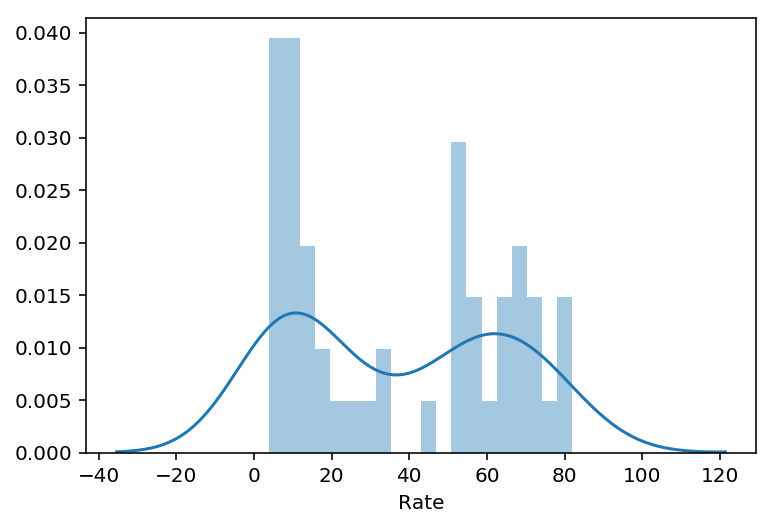

In [38]:
rate = sat_score['Rate']
sns.distplot(rate, bins=20)

The histogram of `Rate` shows that it is not normally distributed. Hence, it would not be suitable to use standard deviation to determine the outliers that lie outside `3 standard deviations`. In fact, the distribution looks like a bi-modal distribution.

<h4>Analyse boxplot</h4>

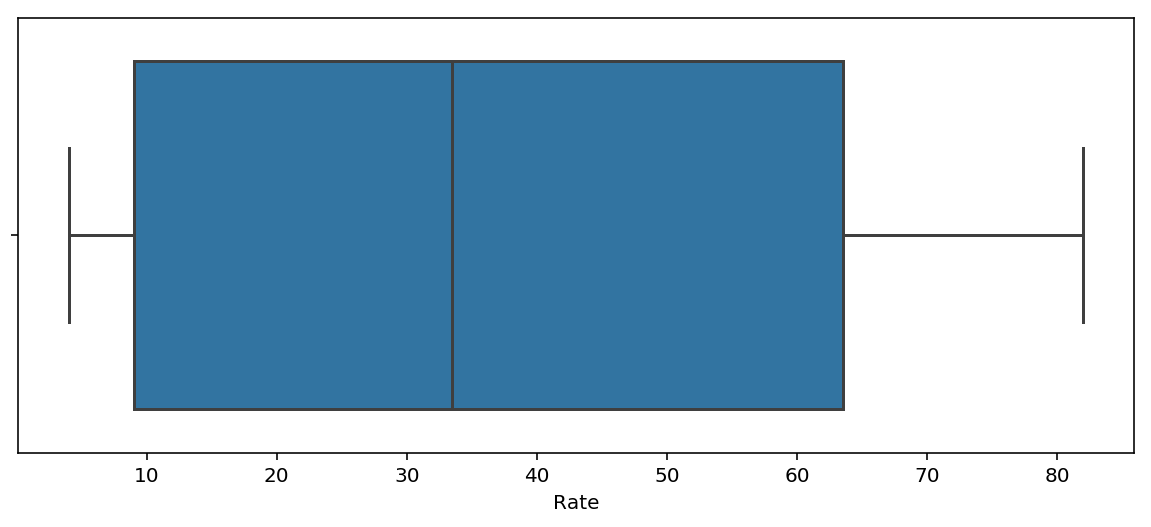

In [39]:
plt.figure(figsize=(10,4))
sns.boxplot(rate)

In [40]:
rate.describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

From the boxplot, we can observe that there are no outliers as well.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.